<a href="https://colab.research.google.com/github/MarioPrado1148/DSWP_Aluno_Mario/blob/MarioPrado1148-Notebooks/Preven%C3%A7%C3%A3o_de_fraudes_em_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do ambiente

## Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Markdown

## Configurações iniciais

In [ ]:
d_configuracao = {
    'display.max_columns': 1000,
    'display.expand_frame_repr': True,
    'display.max_rows': 20,
    'display.show_dimensions': True,
    'display.float_format': (lambda x: '%.5f' % x)
                  }

for op, value in d_configuracao.items():
    pd.set_option(op, value)
    print(op, value)
from IPython.display import Markdown

display.max_columns 1000
display.expand_frame_repr True
display.max_rows 20
display.show_dimensions True
display.float_format <function <lambda> at 0x0000020215600708>


# Importação do banco de dados e verificações iniciais

## Importação do banco de dados

In [ ]:
df_creditCard = pd.read_csv("https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/creditcard.csv")

## Amostragem

In [ ]:
df_creditCard.sample(100, replace= False, random_state= 42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8602,11607,-3.77132,-2.75732,0.96018,-2.84985,-0.85624,0.16901,0.80686,0.25430,3.18523,-2.92096,2.45266,-0.98159,1.32190,1.46404,-0.15994,-0.42980,0.45918,0.32014,-1.18788,-0.11841,0.06641,0.62667,-0.74907,-0.21347,0.56958,-0.90725,0.46669,-0.85194,511.83000,0.00000
11625,19912,1.34896,-0.42678,0.77123,-0.32412,-1.02401,-0.55971,-0.71114,-0.14618,0.48626,0.27545,2.32930,-1.79410,2.10561,1.06688,-2.00310,0.65731,1.20501,-1.13581,0.94609,0.03140,-0.10340,0.04332,-0.01091,0.51614,0.49699,-0.31411,-0.01186,-0.00100,5.00000,0.00000
8347,11153,-1.37745,1.08561,1.49762,-1.46536,0.31056,-0.04656,0.59159,-0.05104,1.70109,0.15002,2.31939,-1.74837,1.95226,1.08864,-0.60350,0.42392,-0.19299,-0.04253,-0.91938,0.43108,-0.32851,-0.22113,-0.08010,-0.32068,-0.27261,0.69748,0.38677,0.18732,30.00000,0.00000
8965,12362,0.88631,-0.54511,-0.02755,0.18820,-0.15222,0.19638,-0.02781,0.06545,1.44946,-0.58340,2.46831,-1.79261,0.57178,2.06044,-0.66996,-0.69710,1.17491,-0.75739,-0.31239,0.06239,-0.05050,-0.09877,-0.14852,-0.25588,0.25720,1.11201,-0.12780,-0.00689,155.00000,0.00000
8802,12004,-5.66607,5.90830,-2.49420,0.15406,-0.54617,1.67141,-3.53319,-11.65698,3.03681,3.11073,-0.23775,-1.20308,2.46230,1.72026,-0.27434,-0.43282,1.20917,0.41970,0.07156,-1.58749,11.19773,-3.62438,1.78644,-0.72687,-0.03934,-0.41788,0.23720,-0.37416,0.89000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,2600,1.24819,0.26479,0.02845,0.54499,-0.22339,-1.25095,0.43047,-0.31352,-0.15240,-0.05671,-0.25343,0.15235,-0.20997,0.53365,0.79036,0.04234,-0.23714,-0.84589,0.10648,-0.08092,-0.37594,-1.17239,0.13348,0.37442,0.27184,0.13718,-0.06905,0.01219,24.95000,0.00000
9271,13362,-0.96031,0.25192,1.23680,1.31058,-0.21478,1.53593,1.94677,-0.42316,1.14748,-0.01065,1.51179,-2.64786,0.64274,1.30407,-0.88421,-0.85141,0.67109,0.39428,1.09727,0.21551,-0.34117,-0.04662,-0.18671,-0.72248,0.17250,-0.24361,0.08252,-0.40332,348.78000,0.00000
5952,6592,0.99821,-0.04221,1.60105,2.89786,-0.48291,1.47627,-0.90714,0.36525,1.65932,0.06288,0.61085,-1.23527,2.35917,0.52110,-3.12871,0.46351,0.18660,0.53196,-0.07929,-0.03184,-0.25818,-0.23725,-0.16405,-0.51742,0.46475,0.02235,0.02951,0.02130,55.66000,0.00000
10672,18043,1.18568,-0.32908,1.00969,-0.56118,-0.97197,-0.30736,-0.73816,0.02989,3.12239,-1.49550,0.70700,-1.75399,1.44188,1.34435,0.80323,-0.75631,0.87415,0.03139,-0.00819,-0.18759,-0.13023,0.12537,-0.00226,0.03380,0.39554,-0.69618,0.08044,0.02706,11.85000,0.00000


## Dimensões do dataset

In [ ]:
df_creditCard.shape

(12842, 31)

## Informações sobre os dados
A variável target, que é 'Class' está como float. Precisa ser convertida para integer, para possibilitar a classificação.<br> No entanto, isto somente poderá ser feito após o tratamento de possíveis missing values.

In [ ]:
df_creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12842 entries, 0 to 12841
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    12842 non-null  int64  
 1   V1      12842 non-null  float64
 2   V2      12842 non-null  float64
 3   V3      12842 non-null  float64
 4   V4      12842 non-null  float64
 5   V5      12842 non-null  float64
 6   V6      12842 non-null  float64
 7   V7      12842 non-null  float64
 8   V8      12842 non-null  float64
 9   V9      12842 non-null  float64
 10  V10     12841 non-null  float64
 11  V11     12841 non-null  float64
 12  V12     12841 non-null  float64
 13  V13     12841 non-null  float64
 14  V14     12841 non-null  float64
 15  V15     12841 non-null  float64
 16  V16     12841 non-null  float64
 17  V17     12841 non-null  float64
 18  V18     12841 non-null  float64
 19  V19     12841 non-null  float64
 20  V20     12841 non-null  float64
 21  V21     12841 non-null  float64
 22

## Verificação do balanceamento da base

In [ ]:
count = pd.DataFrame(df_creditCard2['Class'].value_counts())

percent = pd.DataFrame(df_creditCard2['Class'].value_counts(normalize=True)*100)

table = pd.concat([count, percent], axis=1)

table.columns = ['# target', '% target']
table

,# target,% target
0,12785,99.56390
1,56,0.43610


Class 0: 12785
Class 1: 56
Proportion: 228.3 : 1


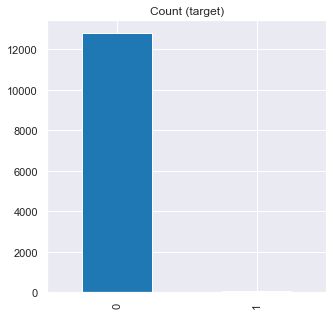

In [ ]:
target_count = df_creditCard2['Class'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

## Oversampling
Como a base está desbalanceada, e a classe minoritária é muito menor do que a classe majoritária, vamos fazer o oversampling.<br>
Referência:https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9

Random under-sampling:
1    56
0    56
Name: Class, Length: 2, dtype: int64


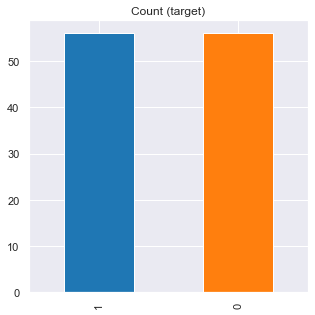

In [ ]:
# CONTAR CLASSES
count_class_0, count_class_1 = df_creditCard2['Class'].value_counts()
# Divide by class
df_class_0 = df_creditCard2[df_creditCard2['Class'] == 0]
df_class_1 = df_creditCard2[df_creditCard2['Class'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under['Class'].value_counts())
df_test_under['Class'].value_counts().plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

# Verificação e tratamento dos Missing Values

## Identificação dos missing values

In [ ]:
df_creditCard.isna().sum().sort_values(ascending = False)

Class    1
V19      1
V10      1
V11      1
V12      1
        ..
V5       0
V6       0
V7       0
V8       0
Time     0
Length: 31, dtype: int64

## Exemplo de linha com missing values (variável Class)
Abaixo verifica-se que a linha 12845, em que a variável Class tem o valor nulo, tem várias outras variáveis com valor nulo.<b>Dessa forma, decidimos excluir todas as linhas que possuem pelo menos um valor nulo.
    

In [ ]:
df_creditCard[df_creditCard['Class'].isna()==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12841,22549,-0.82884,-0.90225,2.47419,-0.62069,-0.87140,0.04934,-0.05638,0.07171,3.45185,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Eliminação dos casos com valor faltante

In [ ]:
df_creditCard2 = df_creditCard.copy()
df_creditCard2.dropna(inplace = True)

## Conferência de Missing Values
Verifica-se que não existe mais nenhum missing value no dataset

In [ ]:
df_creditCard2.isna().sum().sort_values(ascending = False)

Class    0
V14      0
V1       0
V2       0
V3       0
        ..
V25      0
V26      0
V27      0
V28      0
Time     0
Length: 31, dtype: int64

## Conferência das novas dimensões do dataset
Verifica-se que somente uma linha foi excluída.

In [ ]:
df_creditCard2.shape

(12841, 31)

## Conversão da variável 'Class' de float para integer

In [ ]:
df_creditCard2 = df_creditCard2.astype({'Class': int})

## Conferência dos tipos de dados

In [ ]:
df_creditCard2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12841 entries, 0 to 12840
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    12841 non-null  int64  
 1   V1      12841 non-null  float64
 2   V2      12841 non-null  float64
 3   V3      12841 non-null  float64
 4   V4      12841 non-null  float64
 5   V5      12841 non-null  float64
 6   V6      12841 non-null  float64
 7   V7      12841 non-null  float64
 8   V8      12841 non-null  float64
 9   V9      12841 non-null  float64
 10  V10     12841 non-null  float64
 11  V11     12841 non-null  float64
 12  V12     12841 non-null  float64
 13  V13     12841 non-null  float64
 14  V14     12841 non-null  float64
 15  V15     12841 non-null  float64
 16  V16     12841 non-null  float64
 17  V17     12841 non-null  float64
 18  V18     12841 non-null  float64
 19  V19     12841 non-null  float64
 20  V20     12841 non-null  float64
 21  V21     12841 non-null  float64
 22

# Análise univariada de dados

## Sumário estatístico

In [ ]:
df_creditCard2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000
mean,8948.04088,-0.21674,0.27577,0.87581,0.28093,-0.11135,0.13456,-0.14756,-0.03124,0.96619,-0.32029,0.84206,-1.49444,0.96590,0.81593,-0.17755,-0.03649,0.39392,-0.01212,-0.07279,0.02123,-0.06300,-0.14779,-0.03541,0.01523,0.11364,0.04389,0.01137,0.00074,62.21939,0.00436
std,6913.81588,1.65338,1.33874,1.45342,1.49557,1.23218,1.30735,1.20212,1.24366,1.21752,1.20981,1.18988,1.54495,1.17130,1.33175,0.98108,0.94953,1.15850,0.83305,0.82374,0.57196,0.89449,0.62126,0.49601,0.58929,0.42660,0.56394,0.40161,0.25743,175.78011,0.06590
min,0.00000,-27.67057,-34.60765,-24.66774,-4.65755,-32.09213,-23.49671,-26.54814,-23.63250,-7.17510,-14.16679,-2.59533,-17.76914,-3.38951,-19.21433,-4.15253,-12.22719,-18.58737,-8.06121,-4.93273,-13.27603,-11.46843,-8.59364,-19.25433,-2.51238,-4.78161,-1.33856,-7.97610,-3.57531,0.00000,0.00000
25%,2789.00000,-0.96680,-0.28018,0.42048,-0.63152,-0.71326,-0.61825,-0.61217,-0.18052,0.25233,-0.77372,0.04162,-2.44286,0.14888,0.21853,-0.75987,-0.52564,-0.07853,-0.44791,-0.55483,-0.15939,-0.26556,-0.53496,-0.17185,-0.33457,-0.13456,-0.37251,-0.07753,-0.01500,5.49000,0.00000
50%,7605.00000,-0.31940,0.24596,0.96205,0.20575,-0.19511,-0.14690,-0.10903,0.01770,0.94396,-0.37379,0.78263,-1.81763,1.05304,1.09007,-0.04180,0.03416,0.39238,0.04485,-0.06988,-0.03573,-0.12914,-0.11569,-0.04433,0.06711,0.15336,-0.02223,-0.00079,0.01591,15.30000,0.00000
75%,14441.00000,1.16299,0.87583,1.61089,1.16961,0.33723,0.50810,0.42035,0.26532,1.64340,0.13383,1.64836,-0.24873,1.83643,1.54468,0.50446,0.53426,0.87336,0.48555,0.44887,0.14078,0.02058,0.23402,0.07112,0.39792,0.38868,0.39131,0.10157,0.07150,50.00000,0.00000
max,22548.00000,1.96050,10.55860,4.10172,11.92751,34.09931,21.39307,34.30318,8.67569,10.39289,12.25995,12.01891,3.77484,4.46541,7.69221,3.63504,4.81625,9.25353,4.29565,4.55536,8.01257,22.61489,4.53445,13.87622,3.20020,5.52509,3.51735,8.25438,4.86077,7712.43000,1.00000


In [ ]:
def describe_do_mario(df):
    df_descr = df.describe()
    return df_descr.append([
        (df_descr.loc['std'] / df_descr.loc['mean']).rename('cv').to_frame().T,
        df.loc[:, df_descr.columns].mode().set_index(iter(['mode']))
    ])
describe_do_mario(df_creditCard2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000,12841.00000
mean,8948.04088,-0.21674,0.27577,0.87581,0.28093,-0.11135,0.13456,-0.14756,-0.03124,0.96619,-0.32029,0.84206,-1.49444,0.96590,0.81593,-0.17755,-0.03649,0.39392,-0.01212,-0.07279,0.02123,-0.06300,-0.14779,-0.03541,0.01523,0.11364,0.04389,0.01137,0.00074,62.21939,0.00436
std,6913.81588,1.65338,1.33874,1.45342,1.49557,1.23218,1.30735,1.20212,1.24366,1.21752,1.20981,1.18988,1.54495,1.17130,1.33175,0.98108,0.94953,1.15850,0.83305,0.82374,0.57196,0.89449,0.62126,0.49601,0.58929,0.42660,0.56394,0.40161,0.25743,175.78011,0.06590
min,0.00000,-27.67057,-34.60765,-24.66774,-4.65755,-32.09213,-23.49671,-26.54814,-23.63250,-7.17510,-14.16679,-2.59533,-17.76914,-3.38951,-19.21433,-4.15253,-12.22719,-18.58737,-8.06121,-4.93273,-13.27603,-11.46843,-8.59364,-19.25433,-2.51238,-4.78161,-1.33856,-7.97610,-3.57531,0.00000,0.00000
25%,2789.00000,-0.96680,-0.28018,0.42048,-0.63152,-0.71326,-0.61825,-0.61217,-0.18052,0.25233,-0.77372,0.04162,-2.44286,0.14888,0.21853,-0.75987,-0.52564,-0.07853,-0.44791,-0.55483,-0.15939,-0.26556,-0.53496,-0.17185,-0.33457,-0.13456,-0.37251,-0.07753,-0.01500,5.49000,0.00000
50%,7605.00000,-0.31940,0.24596,0.96205,0.20575,-0.19511,-0.14690,-0.10903,0.01770,0.94396,-0.37379,0.78263,-1.81763,1.05304,1.09007,-0.04180,0.03416,0.39238,0.04485,-0.06988,-0.03573,-0.12914,-0.11569,-0.04433,0.06711,0.15336,-0.02223,-0.00079,0.01591,15.30000,0.00000
75%,14441.00000,1.16299,0.87583,1.61089,1.16961,0.33723,0.50810,0.42035,0.26532,1.64340,0.13383,1.64836,-0.24873,1.83643,1.54468,0.50446,0.53426,0.87336,0.48555,0.44887,0.14078,0.02058,0.23402,0.07112,0.39792,0.38868,0.39131,0.10157,0.07150,50.00000,0.00000
max,22548.00000,1.96050,10.55860,4.10172,11.92751,34.09931,21.39307,34.30318,8.67569,10.39289,12.25995,12.01891,3.77484,4.46541,7.69221,3.63504,4.81625,9.25353,4.29565,4.55536,8.01257,22.61489,4.53445,13.87622,3.20020,5.52509,3.51735,8.25438,4.86077,7712.43000,1.00000
cv,0.77266,-7.62857,4.85462,1.65951,5.32356,-11.06586,9.71557,-8.14691,-39.81411,1.26013,-3.77720,1.41305,-1.03380,1.21265,1.63218,-5.52572,-26.02093,2.94095,-68.72873,-11.31692,26.94101,-14.19932,-4.20358,-14.00929,38.69556,3.75386,12.84826,35.30637,346.22548,2.82517,15.11031
mode,3767.00000,-0.30252,0.44747,-0.49576,-3.21480,2.70504,2.76244,0.59385,0.55645,0.69772,-1.09018,-0.11109,0.06265,-0.23846,0.21574,1.06936,-0.25523,-1.07208,0.48511,0.27131,0.15609,0.00734,0.25089,-0.33160,1.00995,0.23373,-0.82447,0.24131,-0.02036,1.00000,0.00000


## Gráficos

### Verificação dos nomes das colunas

In [ ]:
df_creditCard2.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Gráficos de densidade e histogramas

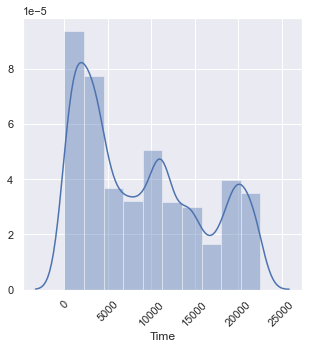

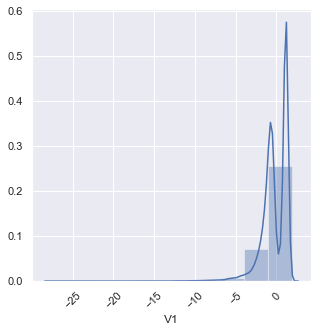

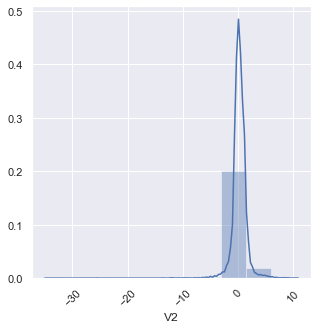

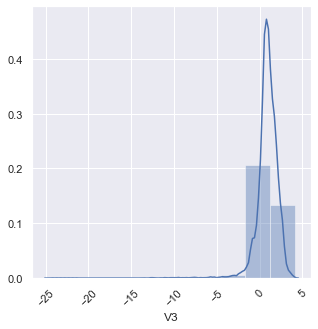

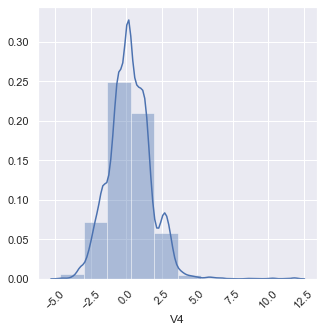

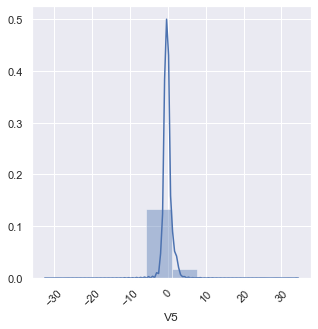

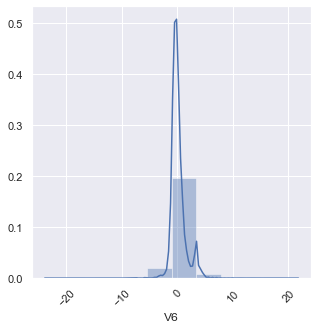

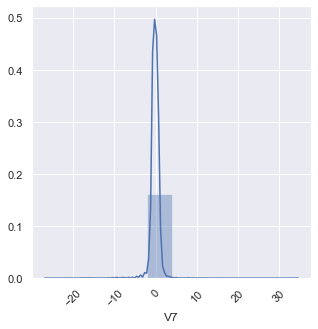

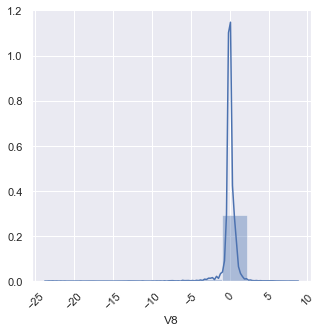

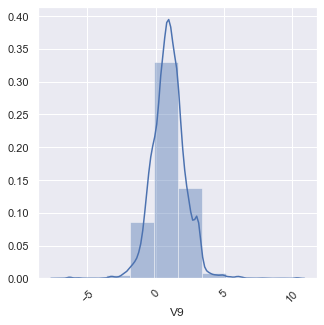

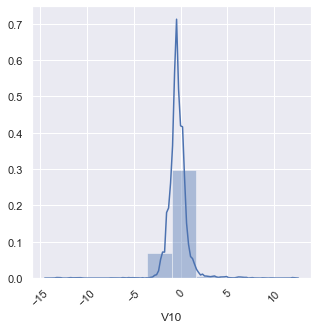

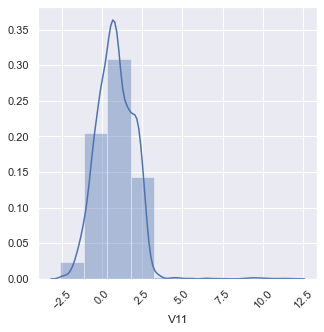

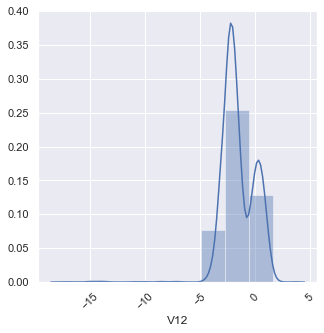

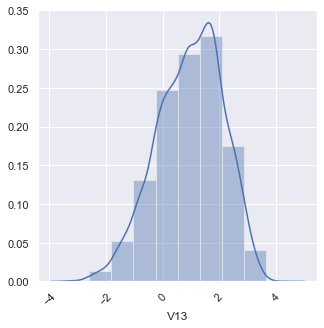

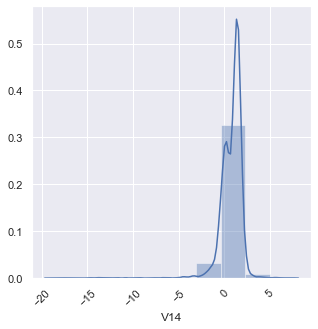

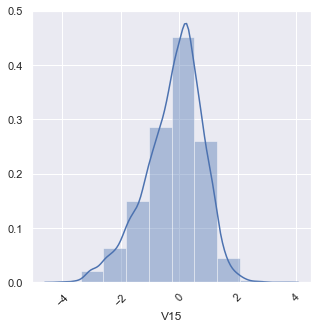

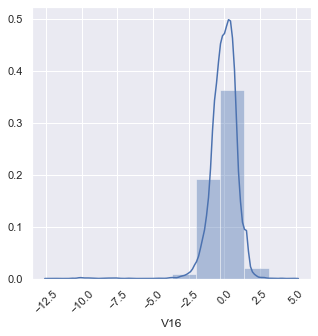

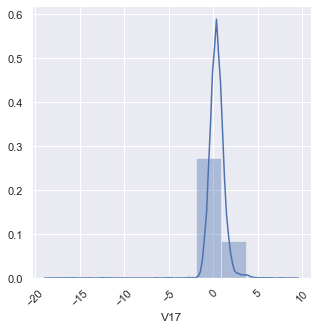

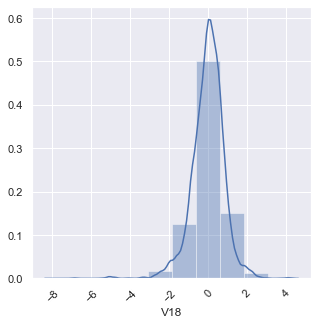

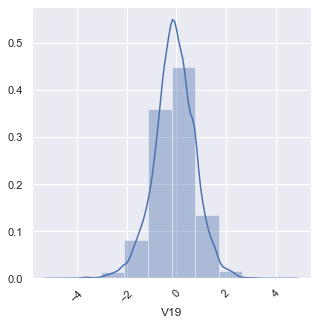

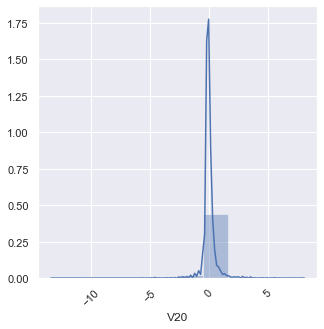

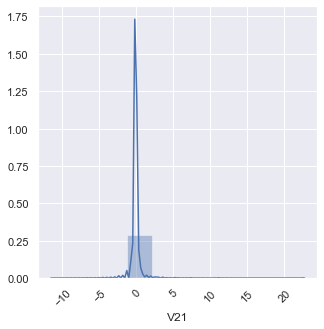

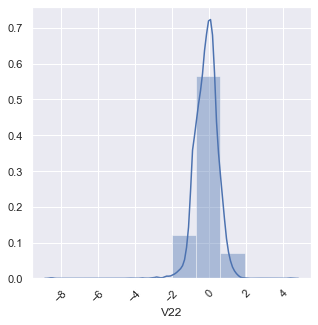

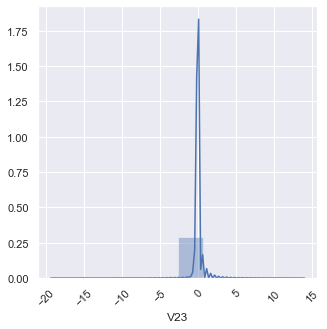

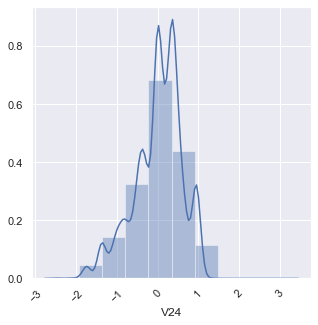

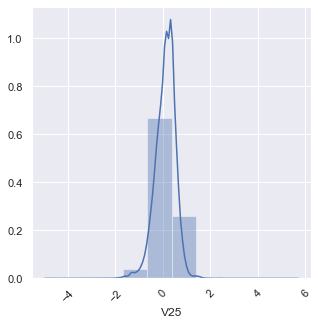

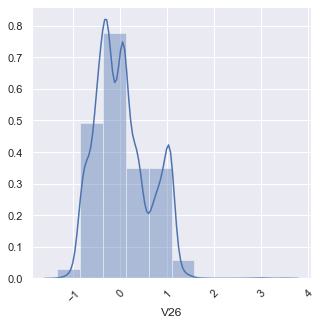

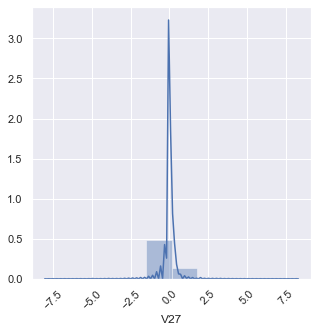

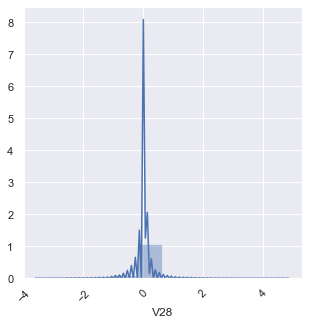

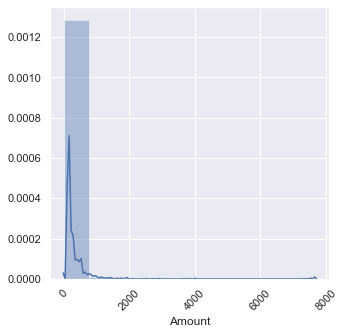

In [ ]:
dados = df_creditCard2
import seaborn as sns
import matplotlib.pyplot as plt
sns.set( rc = {'figure.figsize': (5, 5)})

fnum = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for col in fnum:
    plt.figure()
    sns.distplot(dados[col], bins=10)
    plt.xticks(rotation=45)
    plt.show()

### Boxplots

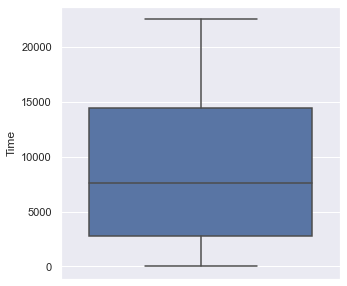

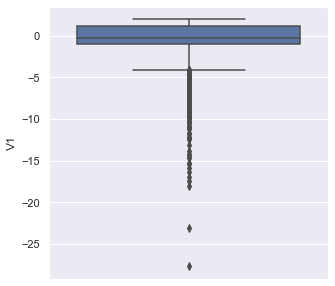

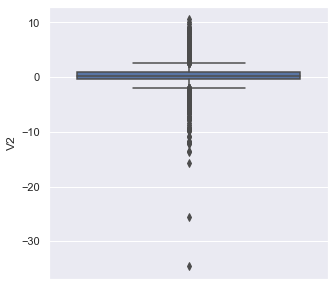

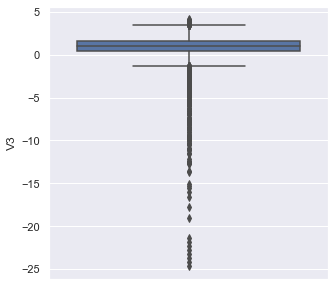

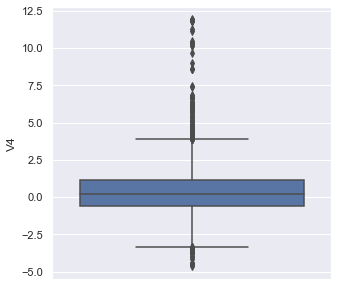

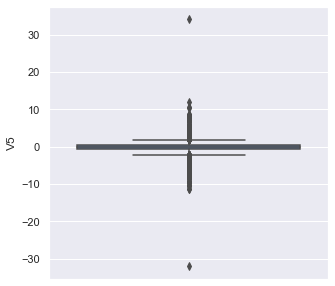

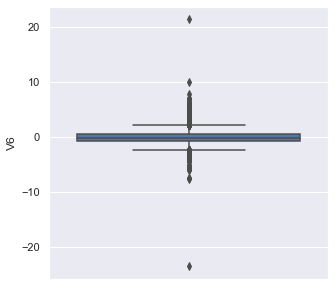

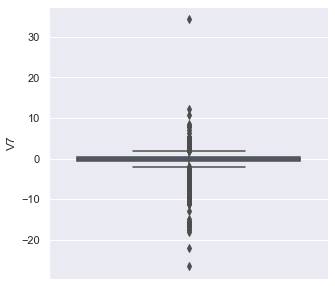

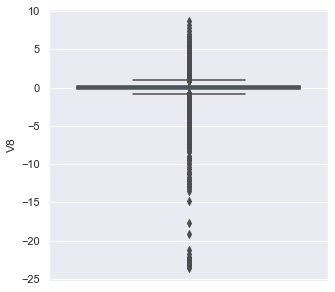

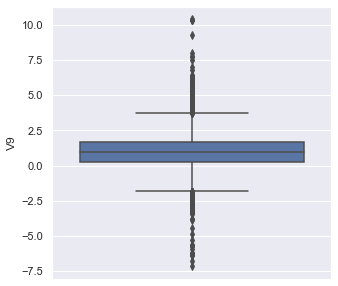

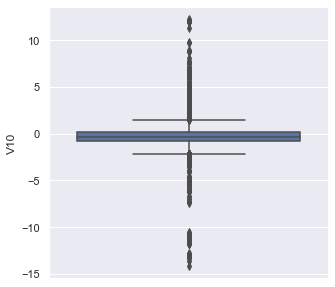

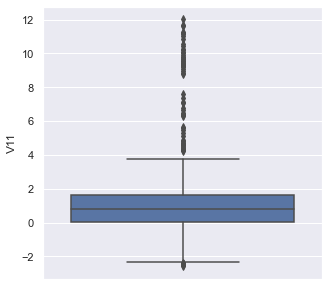

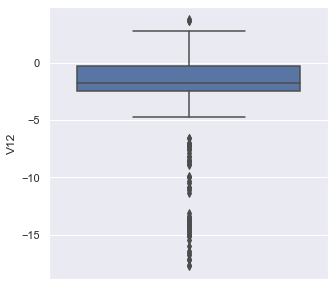

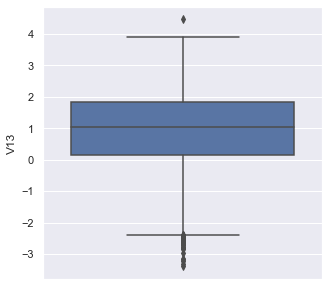

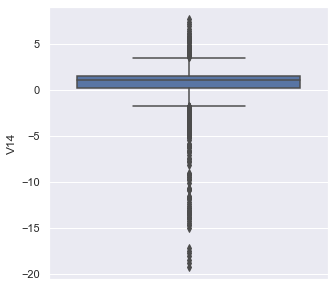

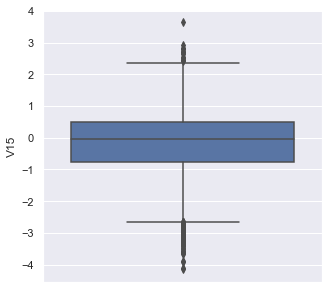

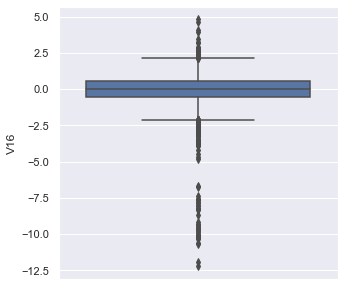

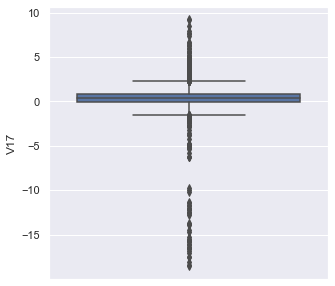

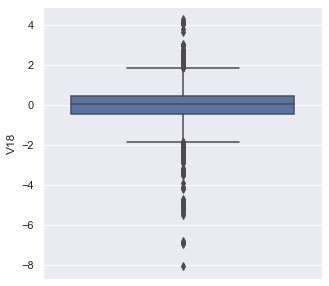

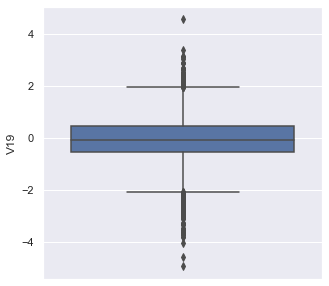

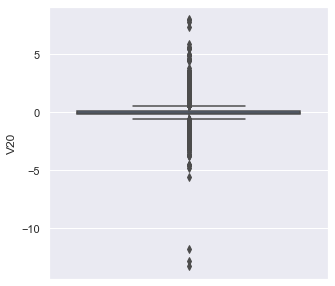

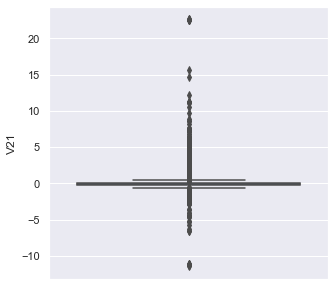

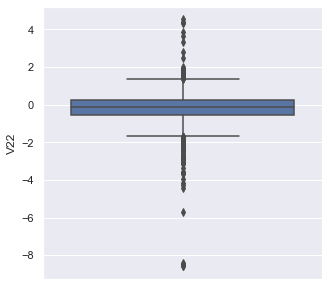

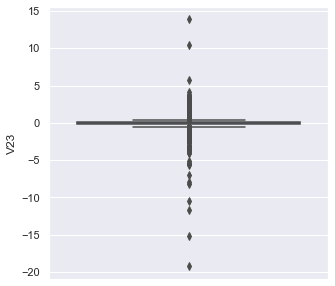

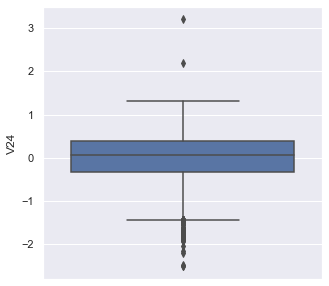

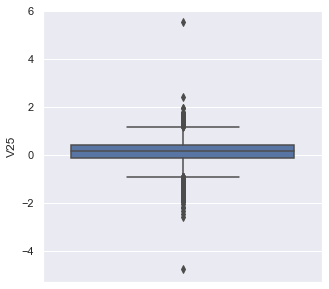

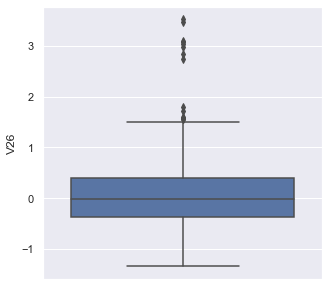

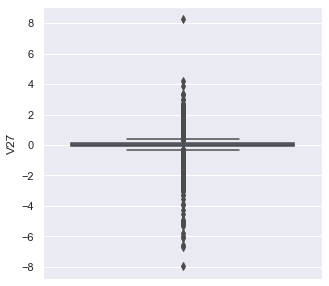

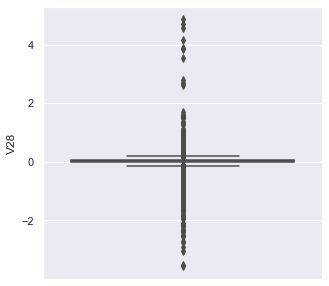

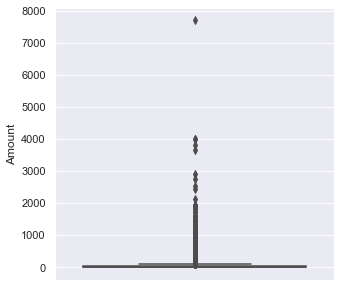

In [ ]:
dados = df_creditCard2
sns.set( rc = {'figure.figsize': (5, 5)})
fnum = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for col in fnum:
    plt.figure()
    sns.boxplot(y=dados[col])
    plt.xticks(rotation=45)
    plt.show()

# Árvore de Decisão

## Separação em explicativas e target

In [ ]:
df_creditCard2_explicativas = df_creditCard2.drop(columns=['Class'], axis=1)
df_creditCard2_target = df_creditCard2['Class']

In [ ]:
df_creditCard2_explicativas.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000
1,0,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000
2,1,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000
3,1,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000
4,2,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000


In [ ]:
df_creditCard2_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, Length: 5, dtype: int32

## Separação em conjunto de treino e de teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_creditCard2_explicativas,
                                                       df_creditCard2_target,
                                                       test_size = 0.3,
                                                        random_state = 42)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((8988, 30), (3853, 30), (8988,), (3853,))

## Importação das bibliotecas

In [ ]:
!pip install graphviz
!pip install pydotplus
from sklearn.metrics import accuracy_score # para medir a acurácia do modelo preditivo
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix # para plotar a confusion matrix

from sklearn.model_selection import GridSearchCV # para otimizar os parâmetros dos modelos preditivos
from sklearn.model_selection import cross_val_score # Para o CV (Cross-Validation)
from time import time
from operator import itemgetter
from scipy.stats import randint

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

np.set_printoptions(suppress=True)

## Função para matriz de confusão

In [ ]:
def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

## Instancia da árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Library para Decision Tree (Classificação)

# Instancia (configuração do Decision Trees) com os parâmetros sugeridos para se evitar overfitting:
ml_DT = DecisionTreeClassifier(criterion = 'gini', 
                               splitter = 'best', 
                               max_depth = None, 
                               min_samples_split = 2, 
                               min_samples_leaf = 1, 
                               min_weight_fraction_leaf = 0.0, 
                               max_features = None, 
                               random_state = 42, 
                               max_leaf_nodes = None, 
                               min_impurity_decrease = 0.0, 
                               min_impurity_split = None, 
                               class_weight = None, 
                               presort = False)

## Treinamento do algoritmo

In [ ]:
ml_DT.fit(X_treino, y_treino)

C:\Users\mario\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

## Uso do cross-validation com k = 10 folds

In [ ]:
# Cross-Validation com k = 10 folds
a_scores_CV = cross_val_score(ml_DT, X_treino, y_treino, cv = 10)

print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')

C:\Users\mario\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\mario\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\mario\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\mario\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

Média das Acurácias calculadas pelo CV....: 99.83
std médio das Acurácias calculadas pelo CV: 0.13


# Transformações de dados

## Transformação StandardScaler

### Importação da biblioteca

In [ ]:
from sklearn.preprocessing import StandardScaler

### Transformação pelo StandardScaler

In [ ]:
    df_creditCard2Scale = pd.DataFrame(StandardScaler().fit_transform(df_creditCard2),
                                       columns=df_creditCard2.columns)

### Amostragem

In [ ]:
df_creditCard2Scale.sample(100, replace= False, random_state= 42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8602,0.38460,-2.14997,-2.26571,0.05805,-2.09345,-0.60455,0.02635,0.79398,0.22961,1.82267,-2.14974,1.35364,0.33196,0.30394,0.48668,0.01794,-0.41423,0.05634,0.39886,-1.35375,-0.24416,0.14467,1.24665,-1.43885,-0.38810,1.06879,-1.68667,1.13378,-3.31246,2.55790,-0.06618
11624,1.58587,0.94655,-0.59953,-0.09407,-0.39720,-0.83617,-0.54971,-0.54754,-0.02798,-0.22293,0.52579,1.05133,-0.66915,-0.20312,0.39415,-1.70579,0.79967,0.76740,-1.14473,1.24901,-0.13555,-0.06309,0.12392,0.08382,0.80762,0.79048,-0.62767,-0.08052,-0.01780,-0.32553,-0.06618
8347,0.31893,-0.70205,0.60495,0.42784,-1.16769,0.34242,-0.13855,0.61489,-0.01592,0.60363,0.38877,1.24163,-0.16437,0.84213,0.20478,-0.43418,0.48490,-0.50663,-0.03650,-1.02778,0.71661,-0.29685,-0.11805,-0.09010,-0.57004,-0.90546,1.15901,0.93477,0.72481,-0.18330,-0.06618
8965,0.49381,0.66717,-0.61319,-0.62157,-0.06201,-0.03317,0.04729,0.09961,0.07775,0.39695,-0.21748,1.36679,-0.19301,-0.33650,0.93452,-0.50193,-0.69575,0.67417,-0.89467,-0.29088,0.07197,0.01397,0.07892,-0.22805,-0.46008,0.33651,1.89411,-0.34655,-0.02964,0.52784,-0.06618
8802,0.44202,-3.29601,4.20749,-2.31876,-0.08484,-0.35290,1.17559,-2.81650,-9.34839,1.70076,2.83612,-0.90753,0.18860,1.27759,0.67908,-0.09866,-0.41742,0.70374,0.51838,0.17524,-2.81276,12.58942,-5.59627,3.67312,-1.25936,-0.35863,-0.81887,0.56231,-1.45640,-0.34891,-0.06618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,-0.91820,0.88606,-0.00820,-0.58304,0.17657,-0.09093,-1.05983,0.48086,-0.22699,-0.91878,0.21788,-0.92071,1.06595,-1.00394,-0.21198,0.98662,0.08302,-0.54474,-1.00090,0.21763,-0.17861,-0.34987,-1.64930,0.34050,0.60956,0.37083,0.16543,-0.20026,0.04446,-0.21203,-0.06618
9271,0.63845,-0.44975,-0.01781,0.24838,0.68849,-0.08394,1.07196,1.74226,-0.31515,0.14891,0.25595,0.56288,-0.74660,-0.27591,0.36655,-0.72032,-0.85827,0.23925,0.48787,1.42048,0.33969,-0.31100,0.16285,-0.30506,-1.25191,0.13796,-0.50983,0.17716,-1.56969,1.63029,-0.06618
5952,-0.34079,0.73485,-0.23753,0.49900,1.74985,-0.30156,1.02632,-0.63189,0.31882,0.56933,0.31673,-0.19433,0.16776,1.18955,-0.22140,-3.00821,0.52660,-0.17896,0.65315,-0.00789,-0.09279,-0.21821,-0.14400,-0.25937,-0.90392,0.82305,-0.03820,0.04517,0.07986,-0.03732,-0.06618
10672,1.31553,0.84824,-0.45182,0.09212,-0.56309,-0.69848,-0.33804,-0.49132,0.04915,1.77105,-0.97144,-0.11352,-0.16801,0.40638,0.39680,0.99973,-0.75811,0.41454,0.05223,0.07843,-0.36511,-0.07517,0.43971,0.06683,0.03151,0.66082,-1.31237,0.17198,0.10224,-0.28656,-0.06618


### Análise gráfica

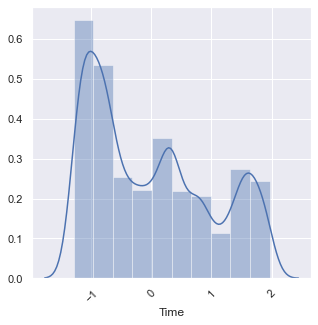

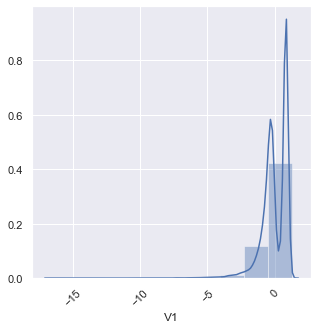

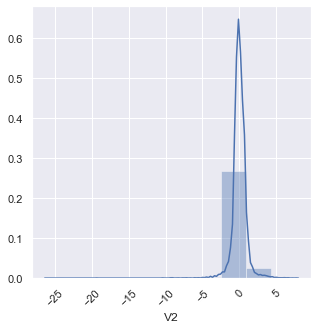

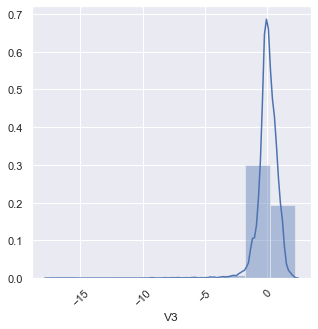

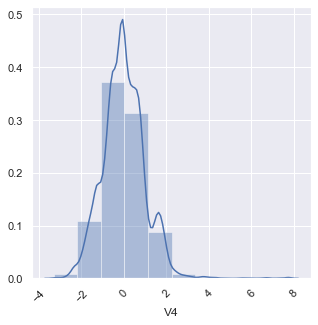

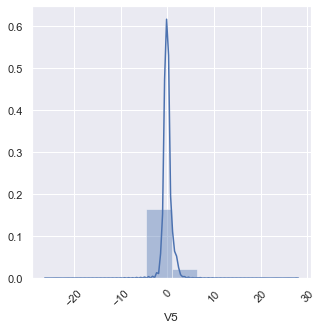

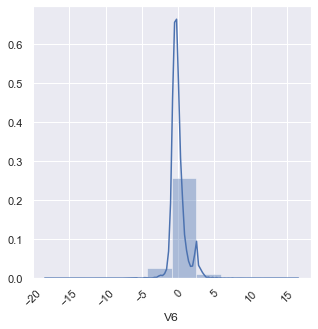

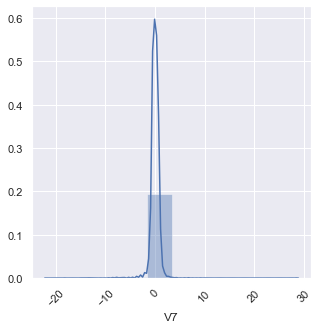

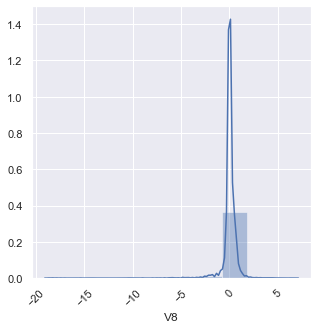

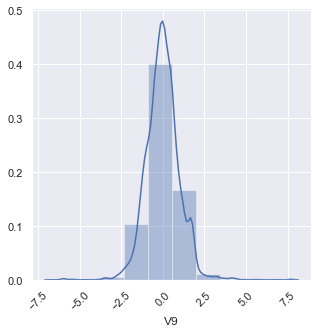

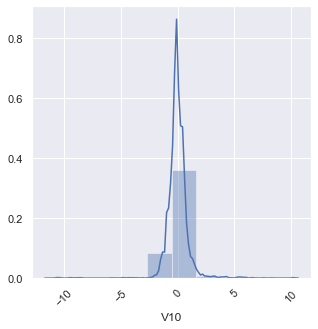

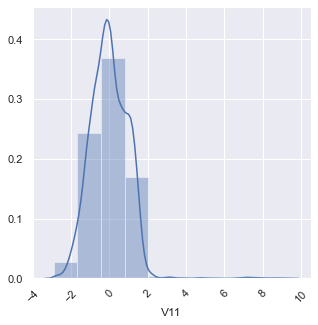

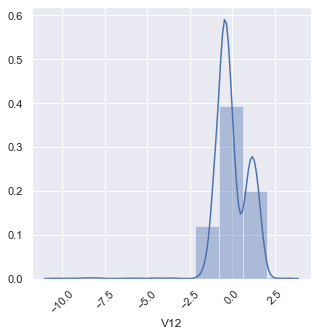

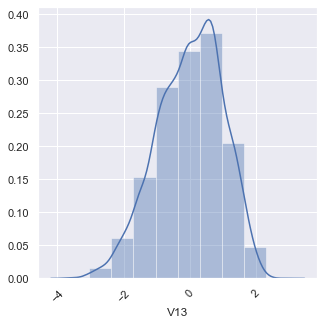

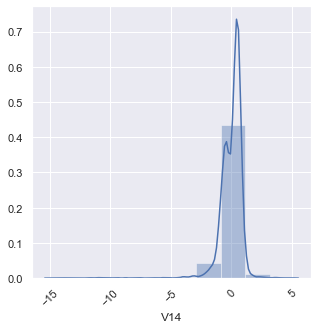

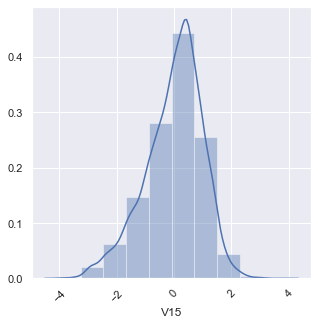

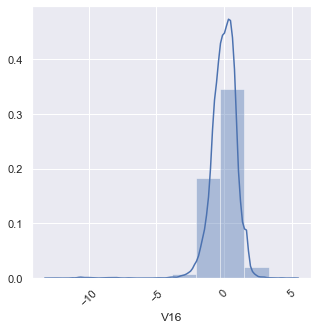

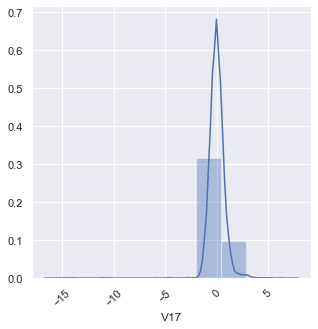

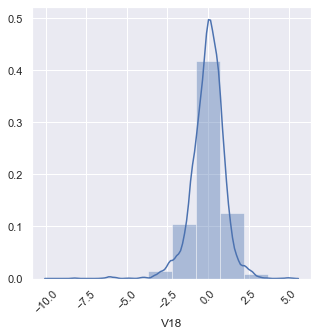

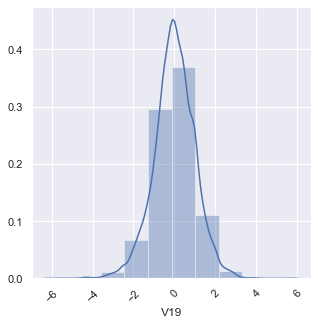

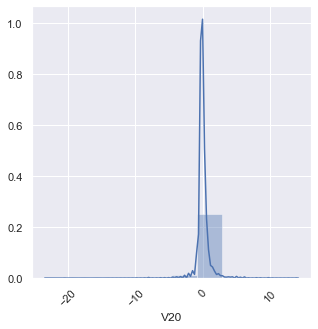

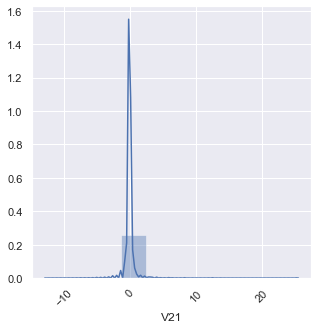

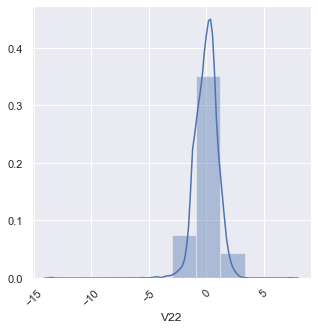

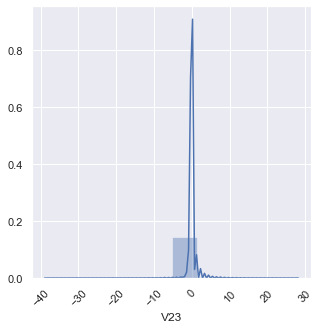

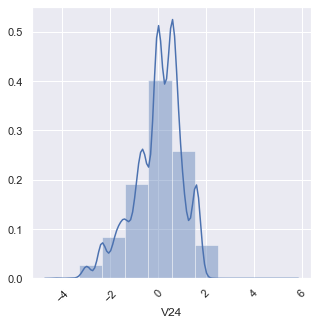

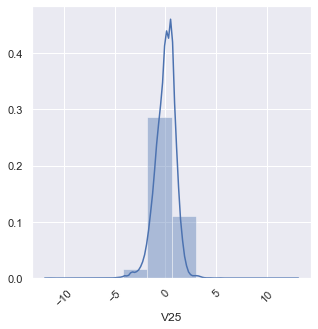

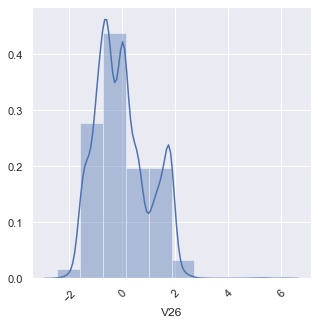

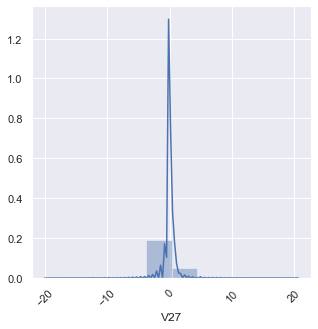

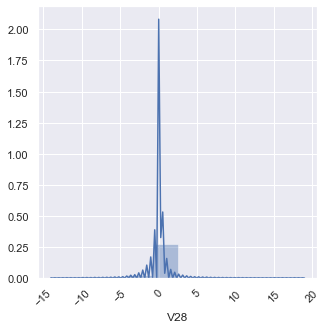

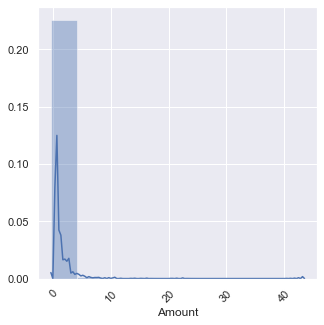

In [ ]:
dados = df_creditCard2Scale
import seaborn as sns
import matplotlib.pyplot as plt
sns.set( rc = {'figure.figsize': (5, 5)})

fnum = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for col in fnum:
    plt.figure()
    sns.distplot(dados[col], bins=10)
    plt.xticks(rotation=45)
    plt.show()

## Transformação Yeo-Johnson

### Importação da library

In [ ]:
from sklearn.preprocessing import PowerTransformer

### Instanciamento do objeto

In [ ]:
yeo_johnson = PowerTransformer(method = 'yeo-johnson', standardize = True)

### Transformação de Yeo-Johnson

In [ ]:
df_creditCard2_yeo_johnson = pd.DataFrame(yeo_johnson.fit_transform(df_creditCard2),
                                          columns = df_creditCard2.columns)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.40697,-0.92384,-0.30538,1.78548,0.76468,-0.17275,0.33858,0.30344,0.02805,-0.49394,0.34426,-1.24111,0.51476,-1.58885,-1.10489,1.97058,-0.59242,-0.26811,-0.02681,0.56418,0.40627,0.10844,0.67146,-0.16836,-0.03719,-0.02052,-0.31567,0.28994,-0.08928,1.34399,-0.06618
1,-2.40697,1.07796,-0.04945,-0.80714,0.18117,0.15172,-0.08667,0.02425,0.01343,-1.00331,0.13175,0.69203,1.86122,-0.46809,-0.99541,0.82650,0.49785,-0.56464,-0.27886,-0.11376,-0.15332,-0.16615,-0.81816,0.26875,-0.70046,0.07279,0.28032,-0.07862,0.04979,-1.08772,-0.06618
2,-2.38624,-0.92318,-1.19515,0.78167,0.13623,-0.30820,1.25202,0.80757,0.19281,-2.04121,0.44031,-0.10615,1.01780,-0.27414,-1.01039,3.32656,-2.47255,0.68231,-0.20541,-2.53797,0.88068,0.44075,1.59403,2.01237,-1.18470,-1.04419,-0.21399,-0.19631,-0.23944,1.85891,-0.06618
3,-2.38624,-0.73682,-0.38814,0.80585,-0.75411,0.09476,0.89055,0.30167,0.34288,-1.93592,0.22421,-0.89940,1.10639,-0.45242,-1.09016,-0.55220,-1.12997,-1.03209,2.78841,-1.38474,-0.39740,-0.00899,0.19745,-0.33073,-1.77323,1.31157,-0.38379,0.10553,0.23180,1.23376,-0.06618
4,-2.37104,-0.83072,0.43296,0.51457,0.15155,-0.22926,0.05772,0.62367,-0.34374,-0.12098,0.88682,-1.54031,1.40212,0.28292,-1.54910,0.26875,-0.57372,-0.67016,-0.10525,1.07205,0.67908,0.11987,1.64574,-0.22337,0.09974,-0.78427,0.87602,0.51662,0.83309,0.90001,-0.06618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12836,1.53808,1.10913,-0.48212,0.05787,0.08472,-0.75907,-0.20743,-0.58333,-0.06434,1.24607,-0.35084,-0.78525,-0.66504,0.16648,0.09564,-0.28868,0.23280,0.08393,0.02850,0.26324,-0.21073,-0.25337,-0.53510,0.10264,-0.11093,-0.05912,1.50814,-0.22728,0.02221,0.22509,-0.06618
12837,1.53815,-1.08287,1.80730,-2.39159,1.12280,0.09233,-1.91834,-0.54479,1.76429,0.05279,-0.98335,-0.14956,-0.99569,0.00953,-1.42798,0.54855,2.04876,4.61036,3.08734,-0.58800,-0.00819,-0.20760,-0.91671,0.08403,-0.97386,-0.90256,-0.76854,0.14669,-0.69077,-1.55285,-0.06618
12838,1.53830,-0.07170,0.29641,0.42244,0.43005,0.16575,0.23105,-0.17206,-0.91109,0.28192,-0.39232,-1.05255,-0.35098,1.48436,0.13405,-0.71613,-0.57659,0.34040,-0.09629,1.22917,-0.14197,0.66878,-0.93884,-1.24093,-0.81075,3.94686,1.14905,0.08278,0.51266,-0.30566,-0.06618
12839,1.53830,0.97115,-0.32072,-0.29762,0.40569,-0.38924,-0.33353,-0.19124,-0.21638,0.59113,-0.13725,-0.49158,-0.64462,0.84137,0.54601,0.80205,0.83158,-0.45386,0.34603,-0.37766,0.05926,-0.15866,-0.70368,-0.00202,-0.42987,0.09164,0.40172,-0.17985,0.10594,1.02916,-0.06618


### Amostragem

In [ ]:
df_creditCard2_yeo_johnson.sample(100, replace= False, random_state= 42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8602,0.57157,-1.77765,-2.12013,-0.11978,-2.38072,-0.60007,0.11531,0.82195,0.20033,1.82059,-2.17065,1.31177,0.26626,0.26115,0.53524,-0.09486,-0.55222,-0.01975,0.34933,-1.33370,-0.23987,0.21650,1.31551,-1.43753,-0.50814,1.10166,-2.04262,1.18708,-3.26508,2.01939,-0.06618
11624,1.33660,1.27914,-0.63406,-0.33182,-0.34299,-0.83757,-0.52150,-0.58072,-0.14405,-0.22197,0.52907,1.05154,-0.70373,-0.26491,0.39046,-1.56548,0.86569,0.88121,-1.13800,1.26867,-0.13091,-0.02369,0.07038,0.07119,0.81001,0.78791,-0.57215,-0.10912,-0.02240,-0.73234,-0.06618
8347,0.52153,-0.93175,0.60174,0.45566,-1.22686,0.35353,-0.05720,0.62243,-0.12883,0.60402,0.39296,1.21617,-0.22899,0.84659,0.10699,-0.52648,0.44336,-0.63252,-0.11052,-1.02540,0.71815,-0.30695,-0.17432,-0.10625,-0.67196,-0.92760,1.14997,0.96765,0.72391,0.38344,-0.06618
8965,0.65230,0.71046,-0.64702,-0.94165,0.00835,-0.02063,0.13665,0.06828,-0.00756,0.39759,-0.21314,1.32293,-0.25661,-0.39839,1.29070,-0.58747,-0.80862,0.75644,-0.91944,-0.31365,0.07680,0.06673,0.02425,-0.24587,-0.57388,0.29417,1.67495,-0.37810,-0.03424,1.36415,-0.06618
8802,0.61439,-2.26881,4.90546,-2.01097,-0.01477,-0.34360,1.16931,-2.64916,-6.30267,1.69899,2.79591,-0.91090,0.11967,1.33722,0.84892,-0.21079,-0.55523,0.79582,0.48172,0.15085,-2.85403,9.32414,-4.65126,4.00081,-1.23331,-0.41364,-0.81306,0.56396,-1.45023,-1.59682,-0.06618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,-0.83668,1.14944,-0.05050,-0.90432,0.24424,-0.07870,-1.15097,0.47522,-0.38405,-0.91850,0.22276,-0.92695,1.08578,-1.02630,-0.45190,1.02705,-0.04171,-0.67025,-1.01305,0.19380,-0.17409,-0.37295,-1.58437,0.33605,0.56143,0.33068,0.29978,-0.23086,0.03992,0.26867,-0.06618
9271,0.75491,-0.73381,-0.06038,0.16612,0.72371,-0.07166,1.08150,1.92146,-0.48453,0.14975,0.26073,0.61446,-0.77452,-0.33804,0.34808,-0.77882,-0.94870,0.20017,0.44769,1.45190,0.34381,-0.32451,0.11051,-0.32342,-1.22767,0.08574,-0.42940,0.15683,-1.56180,1.81458,-0.06618
5952,-0.06581,0.84103,-0.28270,0.57564,1.64582,-0.29150,1.04248,-0.66243,0.32854,0.56976,0.32128,-0.11791,0.09862,1.23691,-0.46343,-2.47806,0.49730,-0.28857,0.63384,-0.03329,-0.08805,-0.21023,-0.20010,-0.27745,-0.95433,0.82421,0.09603,0.01993,0.07537,0.76236,-0.06618
10672,1.18377,1.07019,-0.49263,-0.07026,-0.52553,-0.69623,-0.27689,-0.52595,-0.04517,1.76911,-0.97345,-0.03564,-0.23250,0.37061,0.39455,1.04398,-0.86299,0.41902,-0.01988,0.05321,-0.36143,-0.03801,0.40282,0.05378,-0.09654,0.64454,-1.48582,0.15143,0.09780,-0.19909,-0.06618


### Análise Gráfica

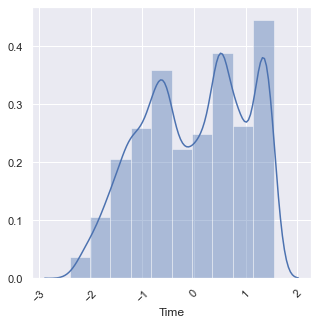

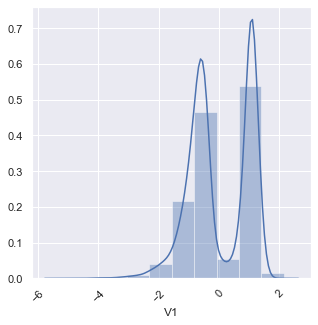

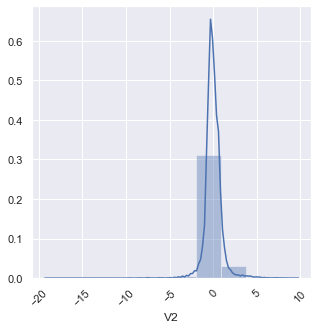

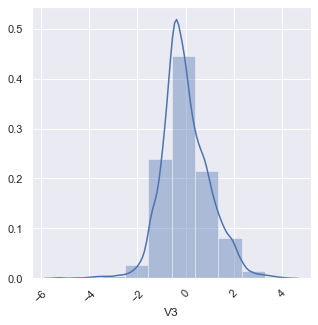

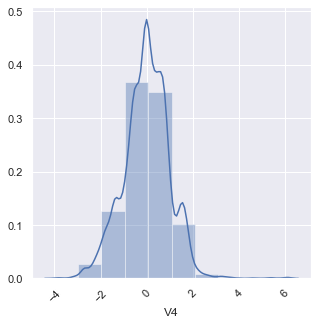

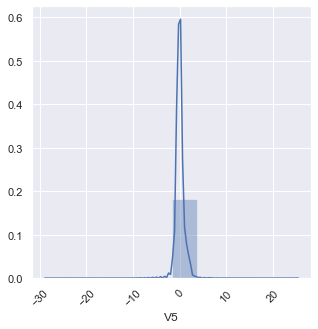

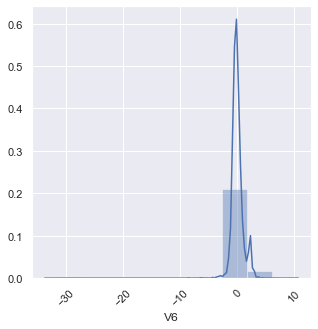

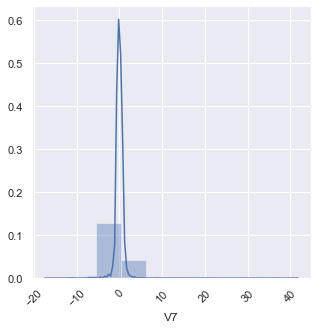

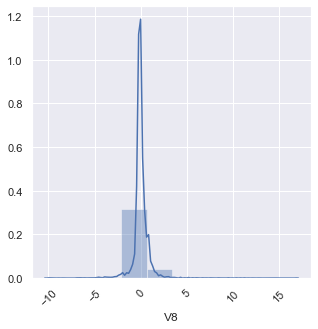

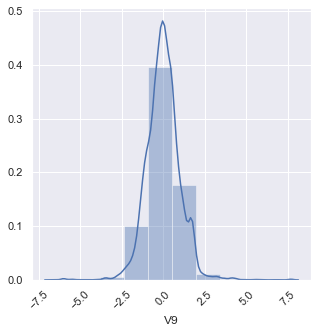

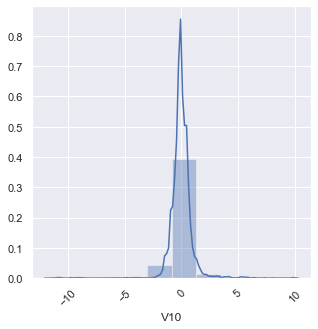

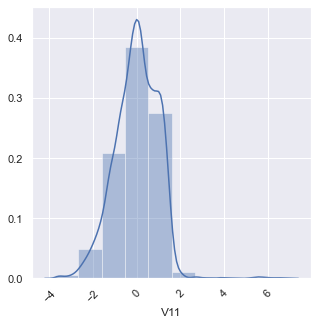

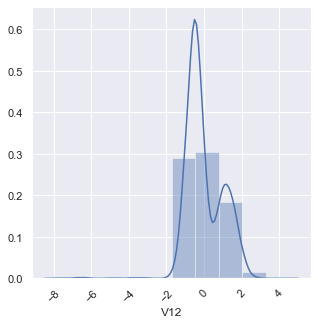

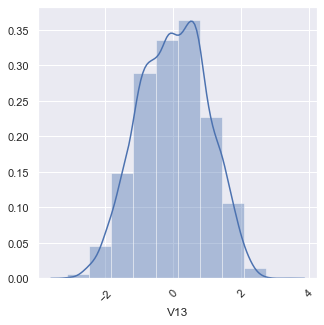

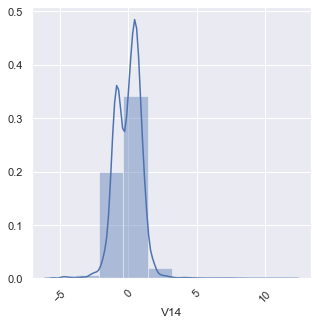

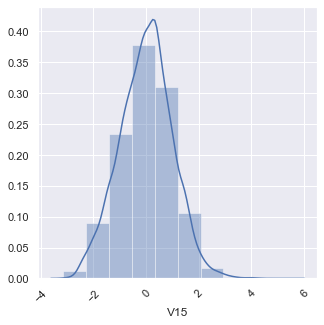

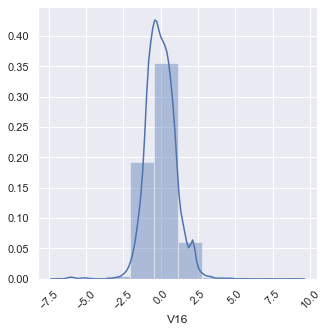

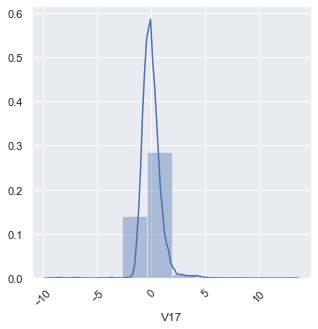

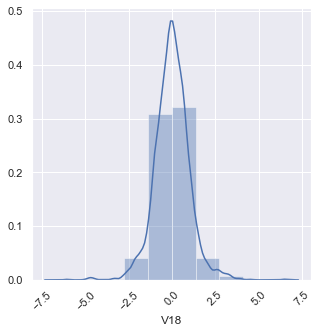

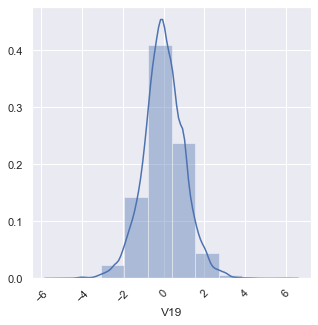

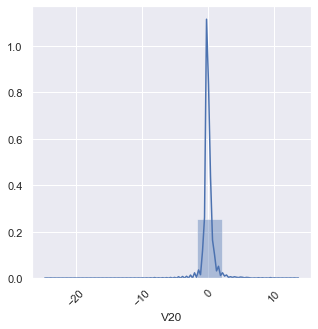

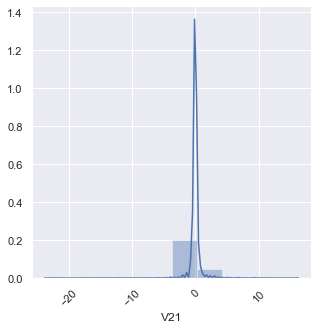

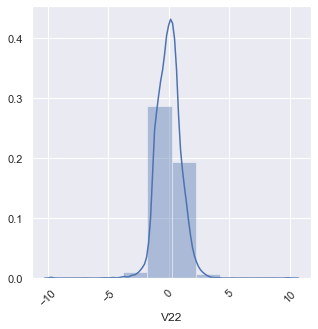

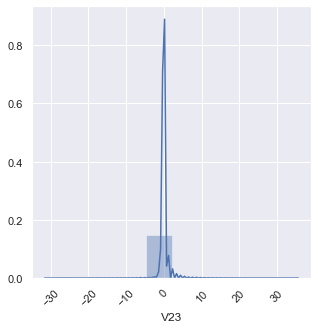

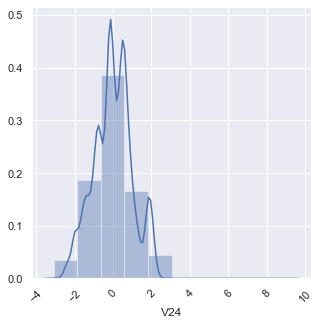

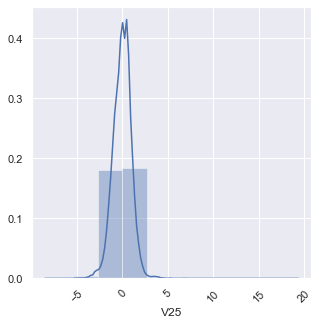

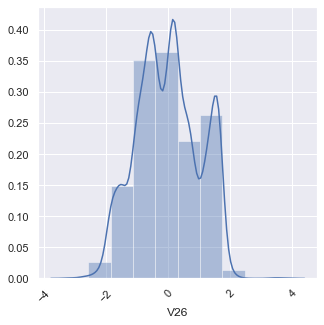

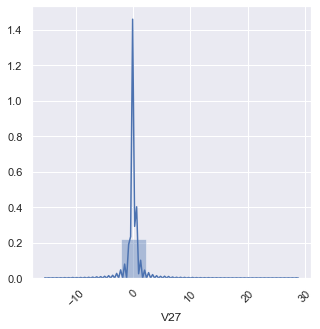

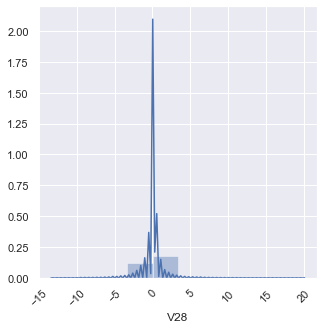

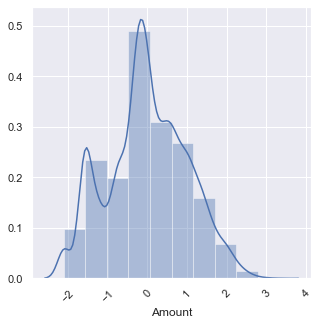

In [ ]:
dados = df_creditCard2_yeo_johnson
import seaborn as sns
import matplotlib.pyplot as plt
sns.set( rc = {'figure.figsize': (5, 5)})

fnum = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for col in fnum:
    plt.figure()
    sns.distplot(dados[col], bins=10)
    plt.xticks(rotation=45)
    plt.show()

# Tratamento de outliers
Referência: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

## Estudo de caso - variável 'Time'

### Verificação do valor do 10º quantil

In [ ]:
quantile10 = pd.DataFrame(df_creditCard2.quantile(0.10))
quantile10.T

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0.10000,993.00000,-1.87414,-0.77405,-0.28223,-1.61449,-1.14777,-1.00384,-1.01551,-0.42387,-0.45759,-1.33586,-0.57975,-3.01303,-0.62435,-0.36389,-1.54067,-1.01934,-0.49712,-0.93740,-1.08631,-0.28960,-0.41189,-0.88403,-0.31485,-0.83300,-0.41911,-0.63922,-0.19705,-0.17003,1.00000,0.00000


### Verificação do valor do 90º quantil

In [ ]:
quantile90 = pd.DataFrame(df_creditCard2.quantile(0.90))
quantile90.T

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0.90000,19907.00000,1.26703,1.42712,2.19772,2.14467,1.17143,1.68784,0.81765,0.70765,2.44141,0.60681,2.29054,0.60052,2.45163,1.87099,0.96875,0.92194,1.36273,0.87942,0.92214,0.40291,0.19585,0.57355,0.20954,0.69687,0.58992,0.97124,0.27553,0.16169,147.69000,0.00000


### Criação de DataFrame para tratamento de outliers

In [ ]:
df_creditCard3 = df_creditCard2.copy()

### Verificação do valor da assimetria antes do tratamento de outliers

In [ ]:
print(f'(Assimetria: {df_creditCard3["Time"].skew()}')

(Assimetria: 0.466921601422467


### Imputação do 10º quantil para os valores menores do que o 10º quantil

In [ ]:
df_creditCard3["Time"] = np.where(df_creditCard3["Time"] <df_creditCard3["Time"].quantile(0.10), 
                                  df_creditCard3["Time"].quantile(0.10)
                                  ,df_creditCard3['Time'])

### Imputação do 90º quantil para os valores maiores do que o 90º quantil

In [ ]:
df_creditCard3["Time"] = np.where(df_creditCard3["Time"] >df_creditCard3["Time"].quantile(0.90), 
                                  df_creditCard3["Time"].quantile(0.90)
                                  ,df_creditCard3['Time'])

### Verificação do novo valor da assimetria

In [ ]:
print(f'(Assimetria: {df_creditCard3["Time"].skew()}')

(Assimetria: 0.4139549547529351


## Tratamento das demais variáveis

In [ ]:
fnum = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for col in fnum:
    
    print(f'Variável {df_creditCard3[col].name}')
    print(f'(Assimetria antes do tratamento dos outliers: {df_creditCard3[col].skew()}')
    df_creditCard3[col] = np.where(df_creditCard3[col] < df_creditCard3[col].quantile(0.10), 
                                  df_creditCard3[col].quantile(0.10),
                                  df_creditCard3[col])
    df_creditCard3[col] = np.where(df_creditCard3[col] > df_creditCard3[col].quantile(0.90), 
                                  df_creditCard3[col].quantile(0.90),
                                  df_creditCard3[col])   
    print(f'(Assimetria após   o tratamento dos outliers: {df_creditCard3[col].skew()}')

Variável V1
(Assimetria antes do tratamento dos outliers: -0.1599629437980076
(Assimetria após   o tratamento dos outliers: -0.1599629437980076
Variável V2
(Assimetria antes do tratamento dos outliers: 0.11332347585178583
(Assimetria após   o tratamento dos outliers: 0.11332347585178583
Variável V3
(Assimetria antes do tratamento dos outliers: -0.010629712037294962
(Assimetria após   o tratamento dos outliers: -0.010629712037294962
Variável V4
(Assimetria antes do tratamento dos outliers: 0.022002290485323452
(Assimetria após   o tratamento dos outliers: 0.022002290485323452
Variável V5
(Assimetria antes do tratamento dos outliers: 0.343737822264794
(Assimetria após   o tratamento dos outliers: 0.343737822264794
Variável V6
(Assimetria antes do tratamento dos outliers: 0.6881695972244012
(Assimetria após   o tratamento dos outliers: 0.6881695972244012
Variável V7
(Assimetria antes do tratamento dos outliers: 0.03189548513126293
(Assimetria após   o tratamento dos outliers: 0.0318954851

## Transformação Min Max Scaler

### Importação da biblioteca

In [ ]:
from sklearn.preprocessing import MinMaxScaler

### Transformação Min Max Scaler  

In [ ]:
df_creditCard3_Trat_Outliers_MinMax = pd.DataFrame(MinMaxScaler().fit_transform(df_creditCard3),
                                                   columns = df_creditCard3.columns)

### Amostragem

In [ ]:
df_creditCard3_Trat_Outliers_MinMax.sample(100, replace= False, random_state= 42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8602,0.56117,0.00000,0.00000,0.50098,0.00000,0.12570,0.43573,0.99412,0.59935,1.00000,0.00000,1.00000,0.56217,0.63272,0.81791,0.55022,0.30369,0.51418,0.69216,0.00000,0.24720,0.78700,1.00000,0.00000,0.40496,0.97983,0.00000,1.00000,0.00000,1.00000,0.00000
11624,1.00000,1.00000,0.11232,0.41183,0.34620,0.00265,0.15595,0.11443,0.31625,0.39751,0.85020,0.93117,0.13417,0.43965,0.76277,0.00000,0.89741,0.95709,0.00000,1.00000,0.33689,0.48124,0.55793,0.61218,0.86552,0.86217,0.20439,0.37262,0.50101,0.02727,0.00000
8347,0.53717,0.15812,0.84485,0.71770,0.03967,0.62880,0.35565,0.87668,0.32950,0.74463,0.76487,1.00000,0.34998,0.83765,0.64993,0.37346,0.74346,0.16352,0.49255,0.08311,1.00000,0.13719,0.45479,0.44767,0.33488,0.14518,0.83001,1.00000,1.00000,0.19770,0.00000
8965,0.60109,0.87880,0.10401,0.10270,0.47955,0.42926,0.44590,0.53880,0.43245,0.65783,0.38734,1.00000,0.33773,0.38886,1.00000,0.34698,0.16599,0.89902,0.09908,0.38533,0.50828,0.59464,0.53874,0.31719,0.37723,0.67025,1.00000,0.14655,0.49182,1.00000,0.00000
8802,0.58216,0.00000,1.00000,0.00000,0.47046,0.25940,0.99390,0.00000,0.00000,1.00000,1.00000,0.11915,0.50088,1.00000,0.93256,0.50463,0.30213,0.91744,0.74697,0.57650,0.00000,1.00000,0.00000,1.00000,0.06938,0.37637,0.13744,0.91888,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,0.08496,0.99400,0.47195,0.12527,0.57446,0.39858,0.00000,0.78879,0.09752,0.10528,0.65845,0.11369,0.87597,0.13471,0.40160,0.92891,0.54690,0.13979,0.05037,0.59388,0.30133,0.05916,0.00000,0.85496,0.78923,0.68476,0.48210,0.27086,0.54932,0.16327,0.00000
9271,0.65396,0.29092,0.46610,0.61252,0.77812,0.40229,0.94356,1.00000,0.00063,0.55366,0.68216,0.72868,0.10106,0.41193,0.74633,0.26160,0.08650,0.62812,0.73298,1.00000,0.72939,0.11636,0.57452,0.24435,0.07224,0.58631,0.24565,0.59159,0.00000,1.00000,0.00000
5952,0.29602,0.91442,0.33248,0.75940,1.00000,0.28668,0.92140,0.05912,0.69739,0.73022,0.72001,0.41480,0.49197,0.96994,0.39599,0.00000,0.76385,0.36762,0.80876,0.50139,0.37221,0.25292,0.44374,0.28756,0.20628,0.87594,0.41080,0.47942,0.57679,0.37262,0.00000
10672,0.90145,0.97410,0.20215,0.52095,0.28020,0.07580,0.25875,0.15130,0.40102,1.00000,0.00000,0.44830,0.34842,0.67173,0.76435,0.93404,0.13549,0.73730,0.53323,0.53679,0.14730,0.46345,0.69252,0.59611,0.56658,0.80736,0.00000,0.58718,0.59416,0.07397,0.00000


### Análise Gráfica

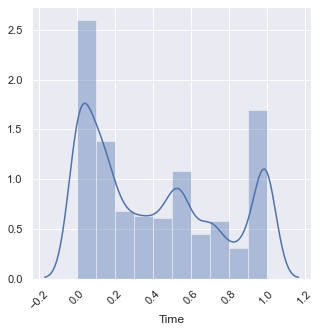

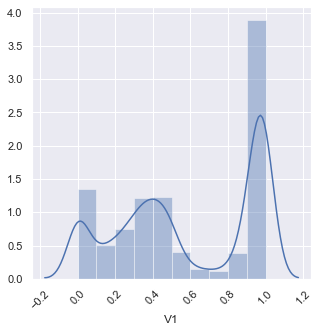

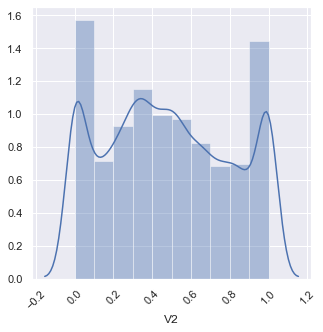

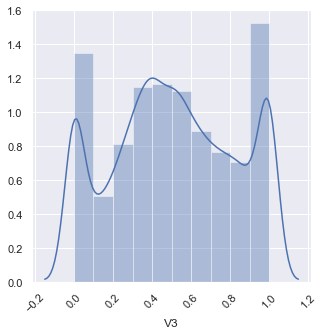

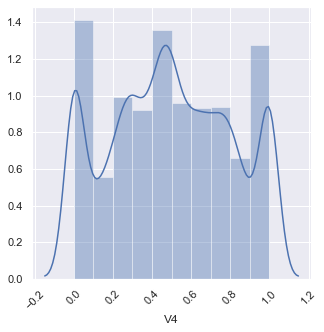

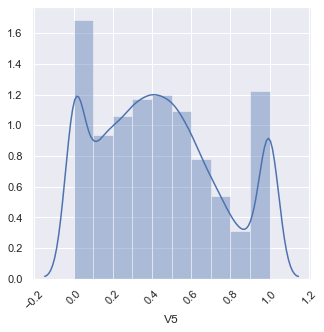

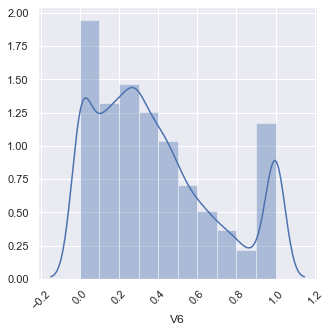

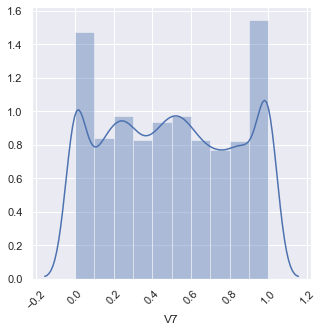

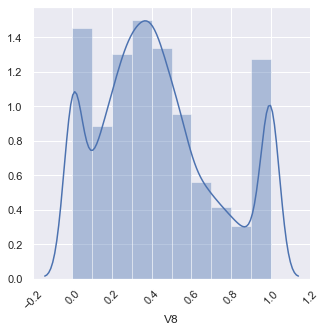

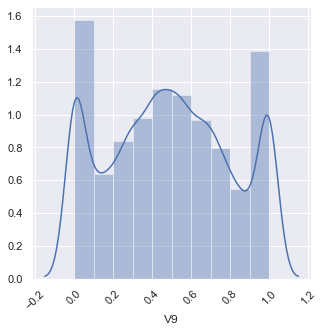

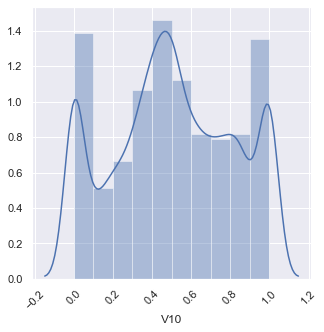

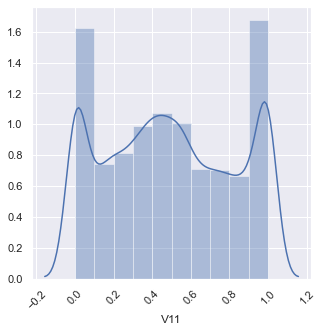

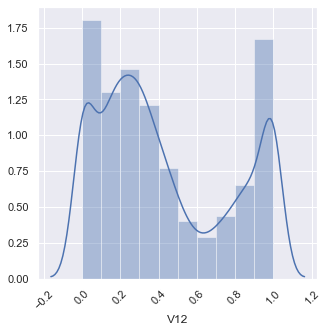

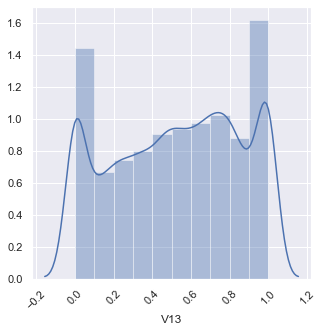

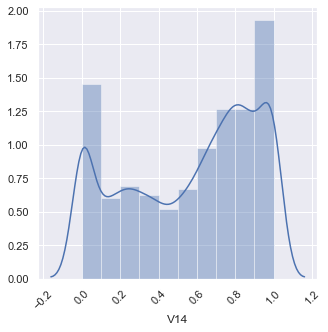

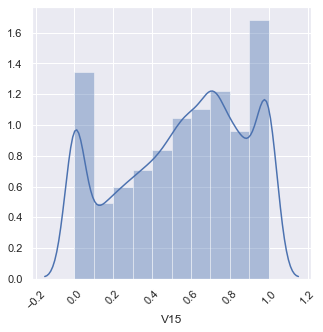

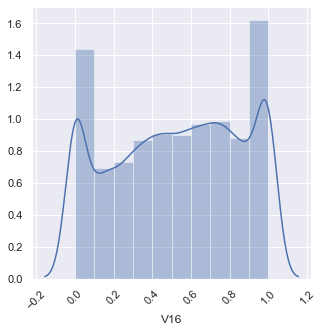

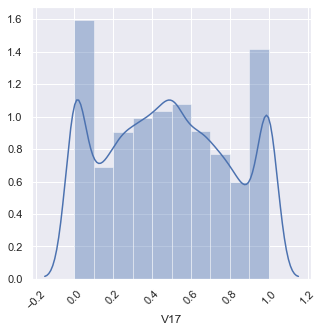

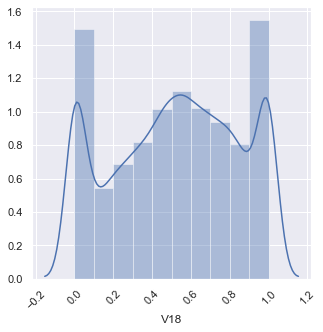

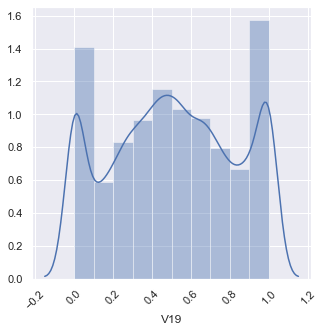

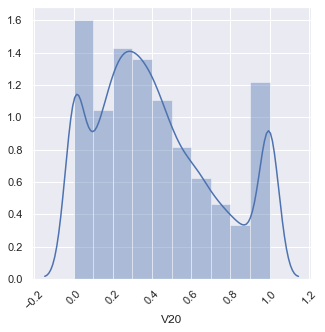

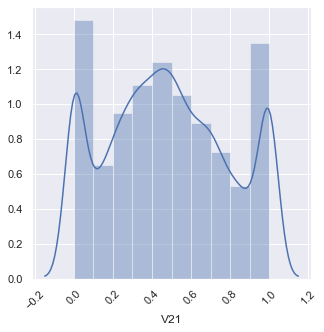

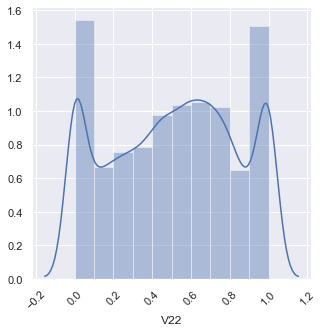

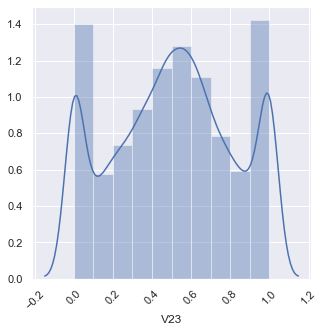

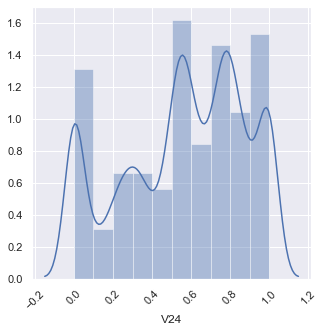

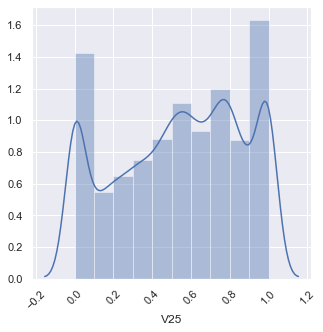

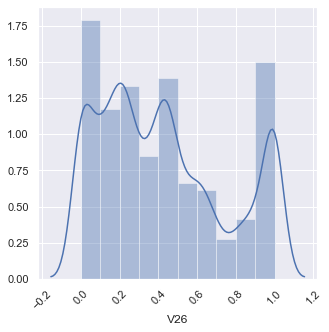

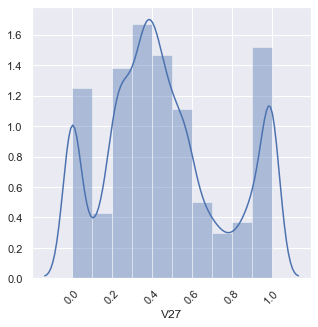

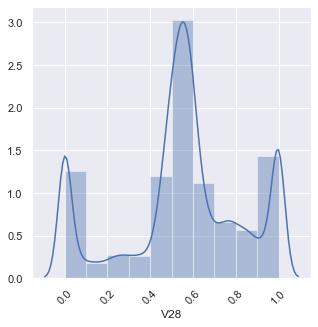

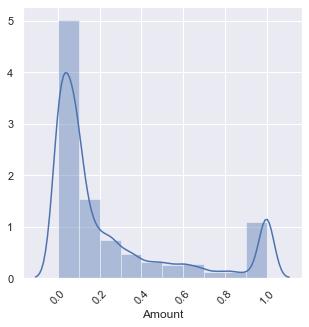

In [ ]:
dados = df_creditCard3_Trat_Outliers_MinMax
import seaborn as sns
import matplotlib.pyplot as plt
sns.set( rc = {'figure.figsize': (5, 5)})

fnum = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for col in fnum:
    plt.figure()
    sns.distplot(dados[col], bins=10)
    plt.xticks(rotation=45)
    plt.show()

## Transformação Robusta

### Importação da biblioteca

In [ ]:
from sklearn.preprocessing import RobustScaler

### Transformação Robusta

In [ ]:
df_creditCard3_RobustScaler = pd.DataFrame(RobustScaler().fit_transform(df_creditCard3),
                                           columns = df_creditCard3.columns)

### Amostragem

In [ ]:
df_creditCard3_RobustScaler.sample(100, replace= False, random_state= 42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8602,0.34346,-0.73000,-0.88236,-0.00157,-1.01061,-0.62936,0.28048,0.88704,0.53068,1.07648,-1.06007,0.93849,0.38103,0.15931,0.28200,-0.09345,-0.43774,0.07018,0.29490,-1.01268,-0.27544,0.68337,0.89631,-1.11340,-0.38304,0.79545,-0.80777,1.54279,-2.14950,2.97439,0.00000
11624,1.05578,0.74488,-0.66849,-0.18729,-0.28806,-0.90103,-0.38813,-0.67477,-0.18780,-0.17913,0.75982,0.81552,-0.32386,-0.19261,0.18908,-1.18550,0.64971,0.93555,-1.05226,0.98836,-0.06851,0.03396,0.05837,0.20784,0.57888,0.56856,-0.37683,-0.11263,-0.22827,-0.23141,0.00000
8347,0.30450,-0.49678,0.72634,0.44991,-0.92781,0.48136,0.08909,0.67855,-0.15418,0.54428,0.57717,0.93849,0.03156,0.53285,-0.00108,-0.44426,0.36773,-0.61497,-0.09361,-0.84636,1.46131,-0.69675,-0.13712,-0.14721,-0.52941,-0.81410,0.94225,1.54279,1.68525,0.33026,0.00000
8965,0.40826,0.56612,-0.68431,-0.83130,-0.00974,0.04082,0.30477,0.07865,0.10710,0.36339,-0.23096,0.93849,0.01140,-0.28518,0.58887,-0.49683,-0.68993,0.82209,-0.85943,-0.24162,0.32690,0.27481,0.02201,-0.42882,-0.44095,0.19845,1.30066,-0.70913,-0.26351,2.97439,0.00000
8802,0.37753,-0.73000,1.02177,-1.04525,-0.02870,-0.33420,1.61434,-0.87794,-0.99041,1.07648,1.08049,-0.63506,0.28009,0.82877,0.47521,-0.18392,-0.44059,0.85808,0.40157,0.14091,-0.84573,1.13575,-0.99917,1.04487,-1.08394,-0.36828,-0.51799,1.32875,-2.14950,-0.32128,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,-0.42954,0.73604,0.01629,-0.78427,0.18835,-0.02693,-0.76081,0.52251,-0.74291,-0.78814,0.34938,-0.64482,0.89784,-0.74843,-0.41958,0.65818,0.00772,-0.66134,-0.95423,0.17570,-0.15055,-0.86249,-0.99917,0.73184,0.41955,0.22643,0.20870,-0.38112,-0.04299,0.21681,0.00000
9271,0.49408,-0.30092,0.00516,0.23080,0.61341,-0.01872,1.49406,0.89749,-0.98882,0.14630,0.40013,0.45381,-0.37838,-0.24313,0.16138,-0.66629,-0.83552,0.29279,0.37434,0.98836,0.83700,-0.74099,0.08981,-0.58603,-1.07795,0.03657,-0.28984,0.46515,-2.14950,2.97439,0.00000
5952,-0.08694,0.61866,-0.24927,0.53679,1.07650,-0.27397,1.44109,-0.77297,0.77952,0.51426,0.48115,-0.10691,0.26542,0.77398,-0.42904,-1.18550,0.40509,-0.21619,0.52183,-0.00937,0.01297,-0.45096,-0.15808,-0.49276,-0.79801,0.59511,0.05837,0.16919,0.06234,0.90676,0.00000
10672,0.89581,0.70668,-0.49744,0.04002,-0.42580,-0.73953,-0.14246,-0.60932,0.02734,1.07648,-1.06007,-0.04707,0.02900,0.23041,0.19174,0.66835,-0.74579,0.50611,-0.01442,0.06147,-0.50589,-0.00383,0.31348,0.17315,-0.04547,0.46285,-0.80777,0.45352,0.12896,-0.07751,0.00000


### Análise gráfica

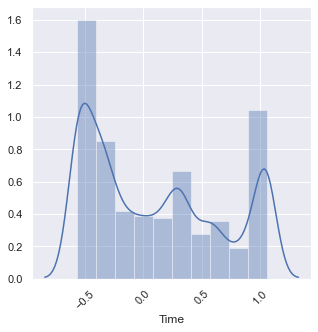

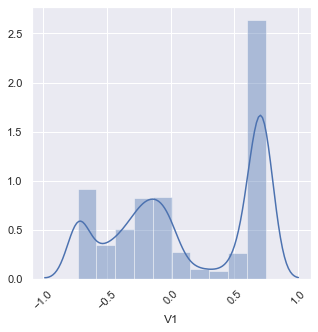

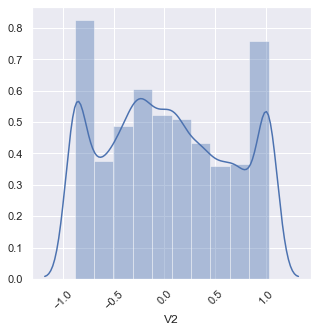

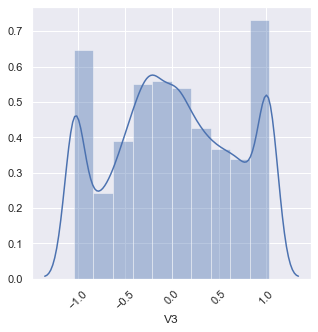

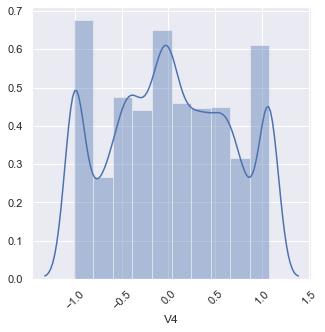

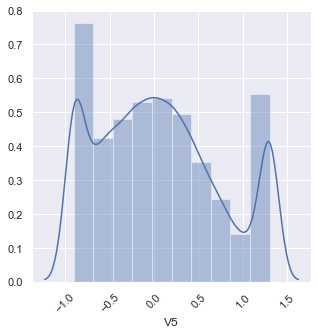

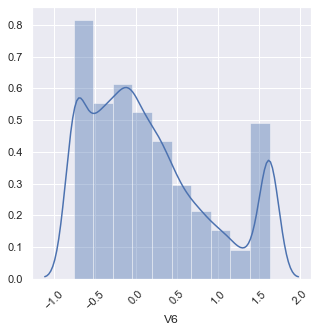

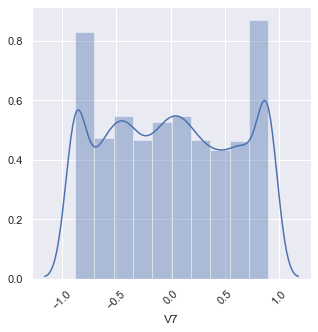

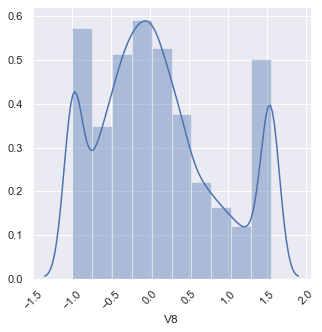

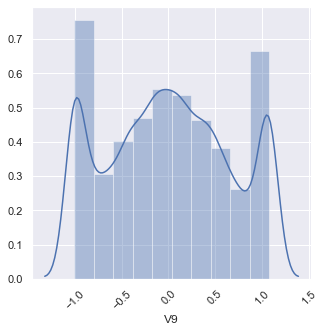

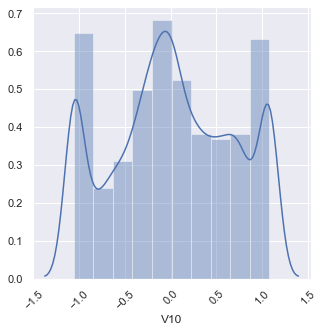

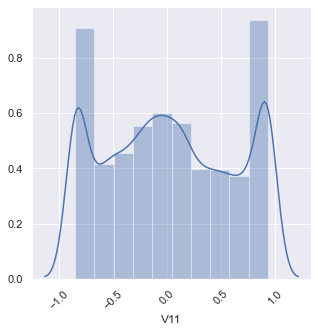

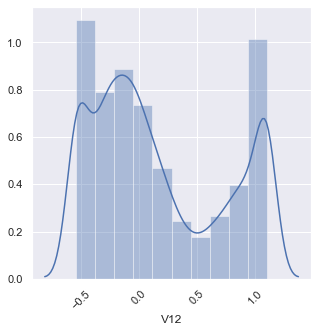

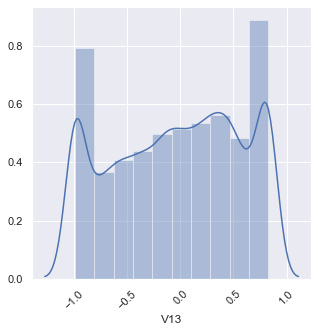

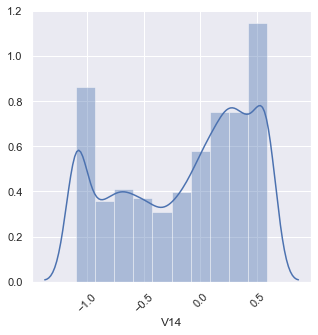

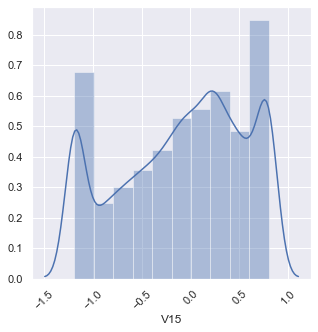

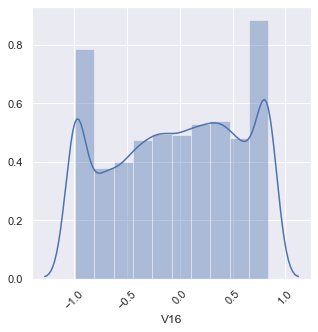

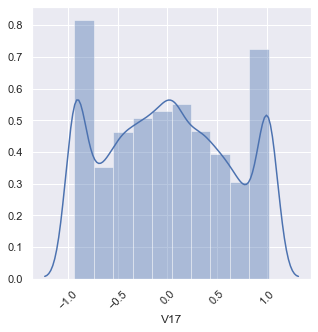

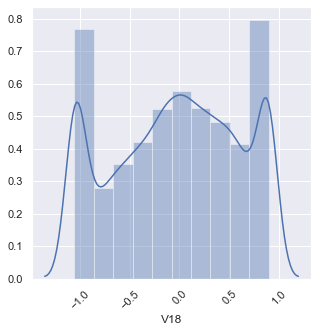

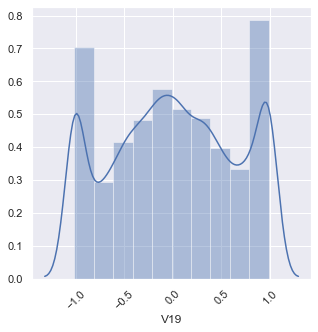

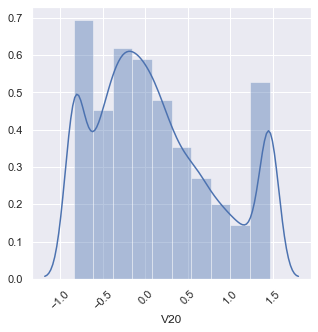

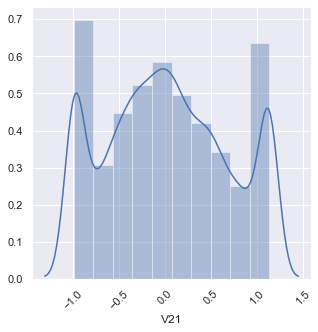

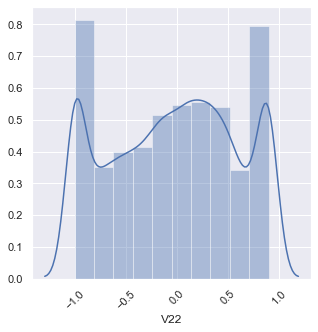

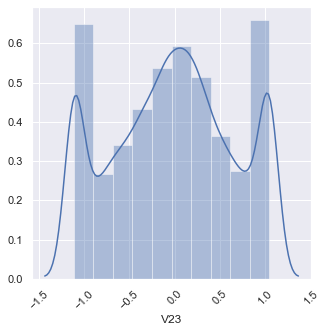

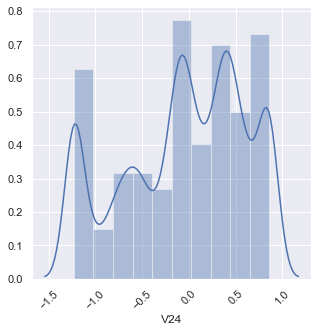

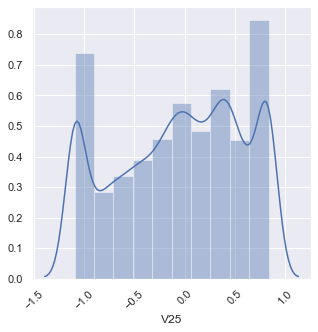

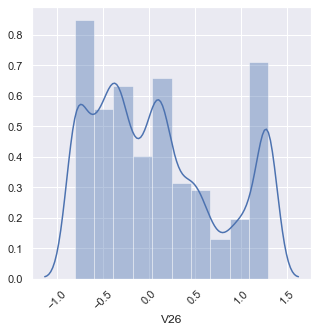

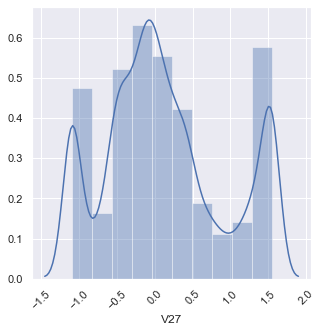

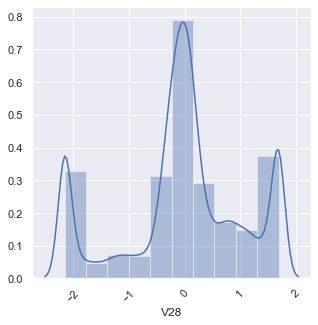

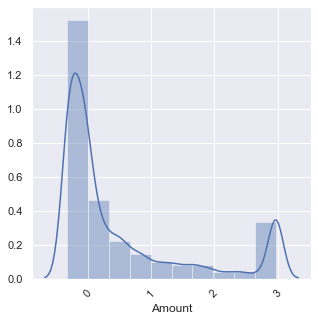

In [ ]:
dados = df_creditCard3_RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
sns.set( rc = {'figure.figsize': (5, 5)})

fnum = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for col in fnum:
    plt.figure()
    sns.distplot(dados[col], bins=10)
    plt.xticks(rotation=45)
    plt.show()